In [1]:
#initial imports
from collections import Counter
from IPython.display import clear_output
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import seaborn as sns
import sys
import time
#BeautifulSoup
from bs4 import BeautifulSoup
#gensim
import bz2
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import multiprocessing
import gensim
from gensim import corpora
from gensim import models
import pickle
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
from gensim.models import Phrases
#NLTK
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords # Import the stop word list
from nltk import word_tokenize
from nltk.corpus import wordnet as wn
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
#plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.figure_factory as ff
from  plotly  import __version__
#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import neural_network
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn import linear_model
#SpaCy
import spacy
spacy.load('en')
from spacy.lang.en import English

2019-02-25 00:06:28,336 : INFO : 'pattern' package not found; tag filters are not available for English
/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:281: DeprecationWarning:

Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.



3.1.0


In [2]:
df = pd.read_csv('~/Desktop/Final Capstone/jobs_db.csv')
pd.set_option('display.max_colwidth', -1)

In [3]:
df.head(10)

id  \
0  15   
1  16   
2  17   
3  18   
4  19   
5  20   
6  21   
7  22   
8  23   
9  24   

                                                                                                                                                                                                 title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                                                                     
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                                                                  
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                                                                  
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                                                                
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                                                                    
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Data Scientist, Natural Language Processing (NLP), descriptive statistics, statistical modelling, machine learning</h3>   
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer, Natural Language Processing /NLP</h3>                                                                  
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing and Machine Learning Engineer</h3>                                                            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Turn our df into X, for later use with modelling, train_test_split and getting a y column.

In [4]:
X = df

## EDA and Data Cleaning

Since we web scraped, the text is in pretty raw format.  To get it into useable shape, I plan to get rid of the html code before tokenizing and lemmatizing it. I'll also check for duplicates, and remove any to keep the results as clean as possible.  From here, it will be easier to determine what words can be added as stop words, or, are meaningful to the analysis in some way.

In [5]:
#Let's check for unique job descriptions. 
#If we drop some duplicates, we'll run our cleaning on less data, which is faster.
X.nunique()

id                 7882
title              3464
job_description    4334
job_class          9   
dtype: int64

In [6]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Computer Vision',
       'Text Analytics', 'Apache Spark', 'Speech Recognition',
       'Neural Networks'], dtype=object)

In [7]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Pattern Recognition            792
Text Analytics                 795
Neural Networks                827
Computer Vision                829
Natural Language Processing    881
Apache Spark                   919
Machine Learning               934
Speech Recognition             944
Text Mining                    961
Name: job_description, dtype: int64

In [8]:
#It stands to reason that we would want to keep the unique job descriptions, because titles like "Data Scientist"
#are broadly used in the field and not necessarily problematic for the scope of this project.
X = X.drop_duplicates(['job_description'], keep = 'last')

In [9]:
#Let's check to make sure we dropped what we had intended.
X.nunique()

id                 4334
title              3431
job_description    4334
job_class          9   
dtype: int64

In [10]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Computer Vision                633
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

The sum of our "female dominated fields is 1,500 which is 34.6% of our dataset. I'm going to drop rows that are Computer Vision job descriptions.  This should help even out the imbalance, and that particular field was the most "gender-balanced" out of the male-dominated job descriptions we have above.

In [11]:
#Dropping Computer Vision
X = X[X.job_class != 'Computer Vision']

In [12]:
X.reset_index(drop=True, inplace=True)

In [13]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [14]:
X.groupby(X['job_class'])['job_description'].count().sort_values()

job_class
Text Analytics                 171
Text Mining                    171
Pattern Recognition            321
Natural Language Processing    510
Machine Learning               573
Apache Spark                   645
Speech Recognition             648
Neural Networks                662
Name: job_description, dtype: int64

Although we lost a large portion of the dataset due to duplicates, it's important to prioritize quality over quantity. I evaluated the dataset to ensure that there would not be a class imbalance problem.  Now, our female-dominated fields comprise 40% of the job descriptions, this is pretty good considering we're working with scraped data. So, we'll proceed with cleaning up the dataset, so we can put it into BoW and Tf-Idf and then run some models on it!

In [15]:
#A quick view of the dataset to see what we might need to clean.
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                                                                                                      title  \
0  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Scientist - Natural Language Processing</h3>                          
1  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Natural Language Processing Engineer, New York City</h3>                       
2  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Research Programmer I - Natural Language Processing</h3>                       
3  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Siri - Natural Language Processing Scientist/Engineer</h3>                     
4  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">NLP and Machine Learning Graduate</h3>                                         
5  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research - Natural Language Processing(NLP) Scientist</h3>                  
6  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Analytical Linguist, Google AI</h3>                                            
7  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">IBM Research AI Residency Program</h3>                                         
8  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">AI Research Engineer – Natural Language Processing</h3>                        
9  <h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">Software Engineer: Machine Learning - Natural Language Processing (NLP)</h3>   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

Lots of HTML script here, as expected. Let's get some of that cleaned up before we tokenize.

In [16]:
X['job_description'] = X['job_description'].replace(r'div class="jobsearch-JobComponent-description icl-u-xs-mt--md"><div></div><div><div><div><b>', '', regex=True).replace(r'</div', '', regex=True)

In [17]:
X['title'] = X['title'].replace(r'<h3 class="icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title">', '', regex=True).replace(r'</h3>', '', regex=True)

In [18]:
X.head(10)

id  \
0  17   
1  18   
2  19   
3  20   
4  21   
5  29   
6  37   
7  38   
8  44   
9  45   

                                                                     title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Much better, our job titles look really nice at this point. Onward!

In [19]:
X['job_description'] = X['job_description'].replace(r'<div class="jobsearch-JobComponent-description icl-u-xs-mt--md">', '', regex=True)


In [20]:
X.sample(10)

id  \
2791  6691   
2245  5963   
56    157    
3088  7143   
766   1997   
1463  3461   
2467  6262   
2223  5934   
1716  4607   
1385  3363   

                                                                        title  \
2791  Staff Dialogue Systems Engineer (702855)                                  
2245  Back End Developer, Mid                                                   
56    Software Engineering Intern, MS, Fall 2019                                
3088  Res Post Doc Fellow                                                       
766   Neuromorphic algorithms intern                                            
1463  Machine Learning - Feature Engineer - GPShopper                           
2467  Internship opportunities for Ph.D. students: Software Engineer - Speech   
2223  Software Engineer, Data                                                   
1716  Senior Technical Architect                                                
1385  PWM Technology - Ayco - Analyst- Production Response and Monitoring       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [21]:
len(X)

3701

In [22]:
#This will get rid of most of the html markers that are within <>
def clean_html(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [23]:
start = time.time()
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_html(X['job_description'][i])
end = time.time()
print("Done in", end - start, "seconds")

Done in 3.7458248138427734 seconds


In [24]:
X.sample(25)

id  \
1891  5499   
1677  4549   
270   535    
1299  3233   
1126  2941   
2325  6065   
692   1890   
3206  7288   
2825  6737   
1684  4559   
2088  5770   
1904  5518   
2835  6758   
1912  5530   
2268  5998   
1854  5449   
3098  7157   
645   1121   
1701  4588   
367   698    
171   350    
780   2021   
489   867    
2224  5935   
556   998    

                                                                        title  \
1891  Full-Stack Developer                                                      
1677  Data Scientist                                                            
270   2019 Scientist Intern, Music Search, Recommendation or Voice Activation   
1299  Curation Editor                                                           
1126  Algorithm &amp; Machine Learning Intern                                   
2325  Sr. Data Architect                                                        
692   Research Analyst                                                          
3206  Director of Data Science                                                  
2825  UI/UX Designer                                                            
1684  Machine Learning (AI) Software Engineer - Innovation Group                
2088  Engagement Data Engineer                                                  
1904  Software Engineer                                                         
2835  FACILITIES CONSTRUCTION SPC 3-020619-17                                   
1912  Commercial Account Executive (New York)                                   
2268  Sr. Big Data Engineer                                                     
1854  Lead Specialist - IT BI Data Analyst                                      
3098  Data &amp; Algorithm Scientist                                            
645   Sr. Data Management Analyst                                               
1701  Data Scientist/Senior Data Scientist                                      
367   Data Support Analyst - Entry-Level - Technology Startup                   
171   Business Analyst - Artificial Intelligence                                
780   Sr. Staff Engineer                                                        
489   Data Scientist                                                            
2224  Applied Data Scientist                                                    
556   Cognitive, Sr. Consultant - Agile Analytics                               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

That worked like a charm! Let's continue cleaning.

In [25]:
X['job_description'] = X['job_description'].replace(r'\n', ' ', regex=True)

In [26]:
X.sample(25)

id                                                     title  \
1873  5478  Knowledge Software Engineer                                
110   254   Mapping Engineer                                           
346   668   Software Engineer, Google Fiber                            
3681  7891  Digital Transformation Lead                                
701   1905  Regional Brand Compliance &amp; Audit Specialist           
221   451   NLP Software Engineer                                      
1998  5648  Data Engineer - Streaming                                  
3452  7633  Computational Photography Researcher                       
957   2264  Overnight Security Officer $13.50 SRO Position Full Time   
3072  7126  Campus Data Scientist - Experiences &amp; Rentals          
1499  3507  FINTECH                                                    
1255  3166  Machine Learning Global Program Director                   
2749  6637  Software Development Engineer - Amazon Lex                 
601   1058  Bioinformatics Data Analyst I                              
820   2082  AI Application Developer                                   
373   705   Research Science Manager                                   
1615  4477  Data Scientist                                             
2111  5799  Software Engineer, Product Security (SecDev)               
1955  5588  Hadoop Developer                                           
1671  4540  IT BSA Manager                                             
1119  2922  Sr. Machine Learning Engineer                              
161   336   CIB - Data Scientist - VP                                  
3446  7627  Research Scientist                                         
81    205   Applied Scientist, Alexa AI                                
2091  5773  Sr Data Engineer                                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [27]:
X['job_description'] = X['job_description'].replace(r'&amp;', ' ', regex=True)

In [28]:
X['title'] = X['title'].replace(r'&amp;', ' ', regex=True)

In [29]:
X.sample(25)

id                                              title  \
3528  7730  Data Analyst                                        
2614  6460  Accounting Specialist                               
3394  7568  Associate Data Analytics Specialist                 
2480  6280  Principal Researcher                                
1700  4587  Product Marketing Manager                           
3107  7169  Senior Data Scientist                               
1419  3407  Associate Product Manager, Integration Studio       
1864  5468  Data Architect, w/Poly                              
2184  5881  ETL Developer                                       
1687  4564  Junior Data Scientist (Secret Clearance Required)   
2118  5808  Software Engineer - Full Stack                      
2136  5829  Director, Software Engineering - Web Experience     
629   1093  Inside Sales Representative                         
2160  5855  Oncology Bioinformatics Engineer                    
1314  3260  Research Intern - DMX Systems                       
1360  3325  Machine Learning Consultant                         
2236  5951  Software Developer                                  
3621  7829  Actuarial Analyst - Quantitative Modeler            
2632  6490  Collections Loan Counselor I (1pm - 10pm M-F)       
349   671   2019 Internship - AI, ML, Full Stack Engineer       
2206  5910  Machine Learning Scientist Engineer                 
1114  2916  Machine Learning Engineer                           
521   919   Director, Analytics   Research                      
2431  6213  Attendant, Ski                                      
3644  7852  AI   Deep learning developer                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [30]:
X['job_description'] = X['job_description'].replace(r'>', ' ', regex=True)

In [31]:
X.sample(25)

id  \
1787  5048   
2541  6356   
2432  6215   
3186  7267   
2491  6294   
1898  5510   
148   313    
1546  3560   
2945  6921   
3613  7821   
479   854    
1569  3588   
557   999    
2605  6449   
110   254    
1275  3201   
3162  7237   
2310  6048   
937   2235   
2343  6085   
517   913    
369   700    
594   1050   
303   597    
3469  7652   

                                                                      title  \
1787  Software Engineer, Compute Engine                                       
2541  Lead Customer Program Manager                                           
2432  NLU Applied Scientist                                                   
3186  Sr. Data Analytics Consultant                                           
2491  Editorial Manager - Alexa                                               
1898  Machine Learning Engineer                                               
148   Assistant Professor - Computer Science                                  
1546  Machine Learning/Data Science Engineer                                  
2945  Sr. Software Development Engineer-Audio                                 
3613  Performance Software Engineer                                           
479   Senior Technical Leader - AI   Image Processing                         
1569  Software and Machine Learning Engineer                                  
557   Senior Solutions Consultant, OEM Analytics                              
2605  Customer Service Representative Team Lead                               
110   Mapping Engineer                                                        
1275  Technical Product Manager                                               
3162  Lead Analytic Scientist                                                 
2310  Java Software Engineer                                                  
937   Postdoctoral Fellow - Immunology, Epigenetics and Cellular Metabolism   
2343  Principal Software Data Engineer                                        
517   Clinical Informaticist                                                  
369   Methodologist                                                           
594   Data Scientist                                                          
303   Data Scientist/Analyst [R, Python,Google Cloud]                         
3469  R D Engineer Intern                                                     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

The last regex left quite a bit of whitespace, which isn't useful. Let's strip that before moving on.

In [32]:
X['job_description'] = X['job_description'].str.strip()

In [33]:
X.sample(25)

id                                                        title  \
2852  6778  Senior Machine Learning Engineer                              
2726  6608  Grants Operations Coordinator Sr - Pediatric Administration   
3275  7393  BioTel Research                                               
1222  3124  Machine Learning / Artificial Intelligence Scientist          
1419  3407  Associate Product Manager, Integration Studio                 
1686  4563  Research Scientist/Engineer                                   
3602  7809  Data Scientist                                                
648   1125  Sr. Data Scientist                                            
53    150   NLU Applied Scientist                                         
225   456   AI Insights Analyst                                           
3104  7165  ASSOCIATE DIRECTOR, DECISION SUPPORT   MACHINE LEARNING       
215   439   Data Analyst                                                  
494   874   Senior Organizational Psychologist                            
2366  6109  Solutions Engineer Lead - Midwest                             
1555  3571  Computational Scientist, Machine Learning                     
2859  6786  Principal Software Engineer                                   
1623  4485  Medical Data Research Analyst                                 
3031  7073  Senior Applied Scientist, Alexa AI                            
2235  5950  Data Engineer                                                 
630   1095  Data Engineer                                                 
1620  4482  Business Systems Analyst - NLP                                
3423  7602  ASR/AI/Machine Learning Scientist                             
1229  3132  Fellow, AI Studio                                             
299   590   AD, Robotics Process Automation                               
3347  7500  Vice President of Engineering                                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [34]:
#We don't need the ids that populated in the SQLite Database
X = X.drop(['id'], axis=1)

In [35]:
X.head(10)

title  \
0  Research Scientist - Natural Language Processing                          
1  Natural Language Processing Engineer, New York City                       
2  Research Programmer I - Natural Language Processing                       
3  Siri - Natural Language Processing Scientist/Engineer                     
4  NLP and Machine Learning Graduate                                         
5  AI Research - Natural Language Processing(NLP) Scientist                  
6  Analytical Linguist, Google AI                                            
7  IBM Research AI Residency Program                                         
8  AI Research Engineer – Natural Language Processing                        
9  Software Engineer: Machine Learning - Natural Language Processing (NLP)   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [36]:
#Let's remove punctuation.
def punctuation_remover(row):
    punctuation = '!"#$&\'()*+,-./:;<=>?@[\\]^_`{|}~«»'  
    
    punctuationNoPeriod = "[" + re.sub("\.","", punctuation) + "]"
    row = re.sub(punctuationNoPeriod, " ", str(row))
    #to remove double white spaces and create space after %,
    row = row.replace('  ', ' ')
    row = row.replace('%', '% ')
    return row.strip()

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<input>:5: DeprecationWarning:

invalid escape sequence \.

<ipython-input-36-b2830c59b60e>:5: DeprecationWarning:

invalid escape sequence \.



In [37]:
# remove punctuation from the job titles first
X['title'] = X['title'].apply(punctuation_remover)

In [38]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [39]:
#Since that worked well, let's now remove punctuation from the job descriptions.
X['job_description'] = X['job_description'].apply(punctuation_remover)

In [40]:
X.head(10)

title  \
0  Research Scientist  Natural Language Processing                       
1  Natural Language Processing Engineer New York City                    
2  Research Programmer I  Natural Language Processing                    
3  Siri  Natural Language Processing Scientist Engineer                  
4  NLP and Machine Learning Graduate                                     
5  AI Research  Natural Language Processing NLP Scientist                
6  Analytical Linguist Google AI                                         
7  IBM Research AI Residency Program                                     
8  AI Research Engineer – Natural Language Processing                    
9  Software Engineer Machine Learning  Natural Language Processing NLP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [41]:
X['gender_breakdown'] = X['job_class']

In [42]:
X.job_class.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [43]:
X.loc[X['gender_breakdown'] == 'Natural Language Processing', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Mining', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Text Analytics', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Speech Recognition', 'gender_breakdown'] = 1
X.loc[X['gender_breakdown'] == 'Pattern Recognition', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Machine Learning', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Apache Spark', 'gender_breakdown'] = 0
X.loc[X['gender_breakdown'] == 'Neural Networks', 'gender_breakdown'] = 0

In [44]:
X.sample(5)

title  \
675   Senior Software Developer   
2511  Hotel Houseperson           
2602  Contact Center CRM          
1252  Machine Learning Engineer   
503   Full Stack Developer        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Unsupervised Approach

I'll use the Latend Dirichlet Allocation method first, and then use it with bigrams and trigrams. I will evalute for coherence, and tune the models.

In [45]:
#First step, tokenizer.
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [46]:
nltk.download('wordnet')
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tiffanyfrench/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
#nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'mircosoft']))

In [48]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [49]:
import random
text_data = []
for text in X:
    for i in range(len(X)):
        tokens = prepare_text_for_lda(X['job_description'][i])
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['internship', 'could', 'change', 'thing', 'travel', 'would', 'amadeus', 'happen', 'travel', 'make', 'world', 'better', 'place', 'fully', 'dedicate', 'improve', 'making', 'reward', 'world', 'software', 'company', 'provide', 'solution', 'services', 'within', 'travel', 'industry', 'idea', 'improve', 'travel', 'everyone', 'working', 'diverse', 'multicultural', 'environment', 'excite', 'ready', 'impact', 'across', 'world', 'great', 'shape', 'future', 'travel', 'together', 'shapethefutureoftravel', 'amadeus', 'summary', 'booking', 'travel', 'provider', 'project', 'focus', 'deliver', 'smart', 'messaging', 'traveler', 'directly', 'travel', 'provider', 'communication', 'services', 'traveler', 'initiate', 'request', 'travel', 'transmit', 'recommendation', 'base', 'request', 'entire', 'booking', 'travel', 'recommendation', 'ticket', 'execute', 'manage', 'image', 'transactional', 'content', 'complete', 'form', 'secure', 'compliant', 'manner', 'responsibility', 'create', 'innovative', 'solution', 

['senior', 'scientist', 'focus', 'working', 'member', 'practice', 'deliver', 'services', 'solution', 'centric', 'industry', 'organization', 'scientist', 'senior', 'participant', 'pivotal', 'growth', 'ironside', 'advance', 'practice', 'collaborate', 'closely', 'enterprise', 'information', 'advisory', 'enterprise', 'information', 'management', 'intelligence', 'team', 'build', 'value', 'enterprise', 'solution', 'client', 'apart', 'leaders', 'industry', 'prefer', 'candidate', 'reside', 'within', 'region', 'travel', 'expectation', 'service', 'region', 'within', 'ironside', 'contribution', 'delivery', 'leverage', 'apply', 'knowledge', 'statistical', 'method', 'analyze', 'solve', 'variety', 'centric', 'challenge', 'across', 'entire', 'client', 'portfolio', 'educate', 'client', 'industry', 'model', 'process', 'order', 'prescribe', 'method', 'approach', 'deployable', 'usable', 'drive', 'desire', 'client', 'outcome', 'effectively', 'conduct', 'interview', 'client', 'stakeholder', 'derive', 'prop

['summary', 'post', 'weekly', 'hours', 'number', '200008277', 'development', 'group', 'looking', 'drive', 'breakthrough', 'development', 'computer', 'vision', 'problem', 'looking', 'people', 'extensive', 'background', 'image', 'processing', 'drive', 'visual', 'fidelity', 'level', 'apply', 'expertise', 'network', 'design', 'optimization', 'hands', 'small', 'innovative', 'building', 'thing', 'qualification', 'solid', 'fundamental', 'computer', 'vision', 'method', 'concept', 'computer', 'vision', 'shipping', 'product', 'development', 'solid', 'development', 'skill', 'knowledge', 'graphics', 'prefer', 'knowledge', 'knowledge', 'software', 'development', 'embed', 'platform', 'prefer', 'great', 'teammate', 'passion', 'state', 'computer', 'vision', 'technology', 'product', 'delivery', 'motivate', 'excellent', 'problem', 'solving', 'skill', 'excellent', 'communication', 'skill', 'stress', 'uncertainty', 'learner', 'description', 'development', 'group', 'responsible', 'algorithm', 'arkit', 'bey

['summary', 'currently', 'seeking', 'entry', 'level', 'engineer', 'knowledge', 'radio', 'frequency', 'groton', 'office', 'objective', 'position', 'massive', 'structure', 'unstructured', 'complex', 'world', 'system', 'useful', 'actionable', 'information', 'using', 'technique', 'immediate', 'focus', 'interpretation', 'electronic', 'warfare', 'include', 'identification', 'acquisition', 'world', 'selection', 'appropriate', 'combination', 'tool', 'framework', 'algorithm', 'development', 'application', 'using', 'hardware', 'ideal', 'applicant', 'advance', 'coursework', 'relate', 'artificial', 'intelligence', 'signal', 'processing', 'algorithm', 'candidate', 'strong', 'following', 'creation', 'representative', 'datasets', 'world', 'collection', 'numerical', 'simulation', 'using', 'technique', 'include', 'ansys', 'performance', 'computing', 'include', 'parallel', 'programming', 'implementation', 'algorithm', 'system', 'using', 'fpgas', 'familiarity', 'physics', 'base', 'explainable', 'initiati

['summary', 'post', 'weekly', 'hours', 'number', '113319890', 'iphone', 'popular', 'camera', 'world', 'seamless', 'integration', 'software', 'hardware', 'deliver', 'magical', 'experience', 'photo', 'memory', 'portrait', 'camera', 'photo', 'leverage', 'privacy', 'respect', 'technology', 'emotional', 'experience', 'hundred', 'million', 'user', 'worldwide', 'looking', 'exceptional', 'software', 'engineer', 'develop', 'innovative', 'application', 'infrastructure', 'generation', 'deeply', 'personal', 'product', 'deliver', 'thrive', 'problem', 'intersection', 'algorithm', 'apply', 'backend', 'engineering', 'position', 'excite', 'inspire', 'qualification', 'years', 'relevant', 'excellent', 'analytical', 'problem', 'solving', 'communication', 'skill', 'apple', 'level', 'framework', 'objective', 'swift', 'asynchronous', 'programming', 'excellent', 'algorithmic', 'background', 'apply', 'artificial', 'intelligence', 'savvy', 'mining', 'knowledge', 'graph', 'highly', 'desirable', 'ability', 'desir

['senior', 'consultant', 'supporting', 'framework', 'enterprise', 'scale', 'environment', 'senior', 'level', 'resource', 'least', 'years', 'scala', 'development', 'debug', 'highly', 'desire', 'specifically', 'service', 'highly', 'desire', 'bachelor', 'degree', 'computer', 'engineering', 'relate', 'field']
['requisition', '14366', 'additional', 'location', 'software', 'engineering', 'software', 'engineering', 'provide', 'cutting', 'individualize', 'experience', 'million', 'student', 'across', 'unite', 'state', 'drive', 'mission', 'continuously', 'improve', 'office', 'energy', 'collaborative', 'hives', 'activity', 'center', 'small', 'autonomous', 'team', 'build', 'great', 'software', 'trust', 'teammate', 'accountable', 'result', 'improve', 'student', 'outcome', 'release', 'constantly', 'experiment', 'approach', 'novel', 'solving', 'problem', 'often', 'succeed', 'sometimes', 'stumble', 'either', 'learn', 'forward', 'confidence', 'passionate', 'technology', 'engineering', 'craftsmanship', 

['cool', 'planet', 'lockheed', 'martin', 'space', 'space', 'lockheed', 'martin', 'pioneer', 'partner', 'innovator', 'builder', 'amaze', 'woman', 'mission', 'difference', 'world', 'every', 'unique', 'skill', 'experience', 'create', 'design', 'build', 'solution', 'worlds’', 'hard', 'engineering', 'problem', 'culture', 'encourage', 'employee', 'dream', 'perform', 'excellence', 'create', 'incredible', 'product', 'provide', 'resource', 'inspiration', 'focus', 'passion', 'courage', 'dream', 'build', 'better', 'tomorrow', 'mission', 'processing', 'group', 'within', 'mission', 'services', 'system', 'solution', 'space', 'seeking', 'experience', 'system', 'engineer', 'expertise', 'requirement', 'algorithm', 'development', 'software', 'development', 'agile', 'scrum', 'environment', 'skill', 'infrastructure', 'system', 'admin', 'arena', 'excite', 'opportunity', 'stack', 'developer', 'strong', 'software', 'engineer', 'system', 'engineer', 'scientist', 'beginning', 'large', 'forward', 'leaning', 'cl

['mclean', '19050', 'unite', 'state', 'america', 'mclean', 'virginia', 'capital', 'building', 'leading', 'information', 'base', 'company', 'still', 'founder', 'chairman', 'chief', 'executive', 'officer', 'richard', 'fairbank', 'capital', 'mission', 'customer', 'succeed', 'bringing', 'ingenuity', 'simplicity', 'humanity', 'banking', 'measure', 'effort', 'success', 'customer', 'enjoy', 'advocacy', 'exhibit', 'succeed', 'succeed', 'guide', 'share', 'values', 'thrive', 'environment', 'collaboration', 'openness', 'value', 'believe', 'innovation', 'power', 'perspective', 'teamwork', 'respect', 'superior', 'result', 'elevate', 'ob', 'right', 'thing', 'associate', 'serve', 'humility', 'respect', 'responsibility', 'helping', 'customer', 'achieve', 'goal', 'realize', 'dream', 'together', 'quest', 'change', 'banking', 'stack', 'software', 'engineer', 'company', 'write', 'develop', 'software', 'build', 'product', 'difference', 'million', 'customer', 'capital', 'group', 'maker', 'breakers', 'doer',

['years', 'degree', 'development', 'internet', 'speech', 'recognition', 'industry', 'negotiate', 'software', 'services', 'agreement', 'manage', 'project', 'working', 'cross', 'functional', 'team', 'deliver', 'result', 'large', 'small', 'customer', 'partner', 'demonstrate', 'developing', 'implement', 'strategic', 'program', 'bachelor', 'degree', 'alexa', 'voice', 'service', 'development', 'seeking', 'innovative', 'result', 'orient', 'centric', 'player', 'negotiate', 'execute', 'relationship', 'agreement', 'hardware', 'software', 'system', 'integrator', 'partnership', 'enable', 'variety', 'company', 'provide', 'functionality', 'using', 'alexa', 'voice', 'service', 'product', 'individual', 'important', 'member', 'contribute', 'overall', 'growth', 'enablement', 'alexa', 'third', 'party', 'devices', 'ideal', 'candidate', 'solid', 'technical', 'expertise', 'sound', 'judgment', 'track', 'record', 'successful', 'negotiation', 'relationship', 'management', 'function', 'position', 'serve', 'memb

['overview', 'princeton', 'plasma', 'physics', 'laboratory', 'seek', 'doctoral', 'physicist', 'position', 'scenario', 'development', 'control', 'kstar', 'tokamak', 'primary', 'focus', 'developing', 'apply', 'reduce', 'model', 'control', 'application', 'fusion', 'flight', 'simulator', 'successful', 'candidate', 'developing', 'integrate', 'plasma', 'control', 'predictive', 'plasma', 'simulation', 'aim', 'developing', 'advance', 'steady', 'state', 'plasma', 'conditions', 'plasma', 'control', 'korean', 'superconducting', 'tokamak', 'kstar', 'position', 'base', 'princeton', 'require', 'regular', 'travel', 'korea', 'interact', 'experiment', 'researcher', 'responsibility', 'successful', 'candidate', 'contribute', 'development', 'fusion', 'flight', 'simulator', 'international', 'collaboration', 'national', 'fusion', 'institute', 'daejeon', 'south', 'korea', 'flight', 'simulator', 'dependent', 'transport', 'solver', 'transp', 'plasma', 'control', 'simulator', 'simulink', 'evolve', 'plasma', 'di

['looking', 'experience', 'developer', 'design', 'develop', 'tripp', 'neural', 'network', 'interface', 'tripp', 'platform', 'client', 'contribution', 'designing', 'building', 'evolve', 'neural', 'network', 'design', 'learn', 'multiple', 'input', 'integrating', 'exist', 'internal', 'partner', 'application', 'multiple', 'language', 'framework', 'developing', 'performance', 'reusable', 'software', 'excellent', 'coverage', 'participate', 'design', 'product', 'deliver', 'unique', 'session', 'evaluate', 'exist', 'technology', 'ensure', 'application', 'utilize', 'industry', 'practice', 'design', 'develop', 'state', 'base', 'algorithm', 'analyze', 'understanding', 'interact', 'tripp', 'community', 'delivery', 'personalize', 'altering', 'experience', 'create', 'management', 'workflow', 'collection', 'storage', 'training', 'validation', 'drive', 'scalable', 'software', 'architecture', 'deliver', 'unique', 'personalize', 'tripp', 'session', 'years', 'designing', 'developing', 'python', 'scala', '

['amazon', 'building', 'world', 'class', 'advertising', 'defining', 'deliver', 'collection', 'service', 'performance', 'advertising', 'product', 'drive', 'discovery', 'sales', 'merchandise', 'product', 'strategically', 'important', 'retail', 'marketplace', 'business', 'driving', 'growth', 'deliver', 'billion', 'impression', 'million', 'click', 'daily', 'breaking', 'fresh', 'ground', 'create', 'world', 'class', 'product', 'highly', 'motivate', 'collaborative', 'love', 'entrepreneurial', 'spirit', 'action', 'broad', 'mandate', 'experiment', 'innovate', 'growing', 'unprecedented', 'seemingly', 'endless', 'range', 'opportunity', 'looking', 'experience', 'apply', 'scientist', 'sponsor', 'product', 'search', 'supply', 'sponsor', 'product', 'help', 'merchant', 'retail', 'vendor', 'brand', 'owner', 'succeed', 'native', 'advertising', 'grow', 'incremental', 'sales', 'product', 'amazon', 'search', 'supply', 'works', 'complex', 'engineering', 'optimization', 'econometric', 'problem', 'order', 'de

['rochester', 'state', 'minnesota', 'telecommute', 'department', 'planning', 'services', 'position', 'description', 'scientist', 'clinic', 'perform', 'detail', 'large', 'body', 'heterogeneous', 'order', 'discover', 'pattern', 'insight', 'impact', 'patient', 'health', 'augment', 'human', 'capability', 'candidate', 'expertise', 'statistical', 'processing', 'regression', 'technique', 'neural', 'network', 'decision', 'tree', 'clustering', 'pattern', 'recognition', 'probability', 'theory', 'method', 'mathematical', 'theory', 'underlie', 'tool', 'analyze', 'knowledge', 'healthcare', 'type', 'topic', 'scientific', 'challenge', 'approach', 'knowledge', 'architect', 'informaticians', 'clinician', 'partner', 'outside', 'company', 'develop', 'deploy', 'application', 'bring', 'analytic', 'solution', 'nontechnical', 'user', 'often', 'point', 'design', 'develop', 'script', 'software', 'application', 'support', 'management', 'extraction', 'require', 'position', 'develop', 'predictive', 'prescriptive'

['summary', 'post', 'weekly', 'hours', 'number', '200010528', 'people', 'passion', 'change', 'world', 'launch', 'defining', 'moment', 'history', 'artificial', 'intelligence', 'hundred', 'million', 'people', 'message', 'favourite', 'selfie', 'imagine', 'could', 'apple', 'apple', 'driving', 'revolution', 'people', 'machine', 'interact', 'looking', 'creative', 'engineer', 'eager', 'boundary', 'single', 'difference', 'life', 'user', 'speaking', 'recent', 'graduate', 'individual', 'years', 'access', 'excellent', 'resource', 'include', 'compute', 'grid', 'quality', 'tool', 'large', 'quantity', 'together', 'boundary', 'artificial', 'intelligence', 'single', 'difference', 'life', 'hundred', 'million', 'user', 'qualification', 'sound', 'understanding', 'fundamentals', 'essential', 'phenomenal', 'software', 'engineering', 'skill', 'essential', 'experience', 'application', 'conversational', 'dialogue', 'system', 'desire', 'working', 'large', 'scale', 'learn', 'system', 'desire', 'publication', 'c

['scientist', 'operate', 'interface', 'broad', 'optical', 'profiling', 'platform', 'science', 'platform', 'optical', 'profiling', 'platform', 'focus', 'developing', 'implement', 'imaging', 'technique', 'scale', 'generate', 'throughput', 'previously', 'inaccessible', 'phenotype', 'science', 'platform', 'world', 'leader', 'developing', 'pipeline', 'infrastructure', 'large', 'scale', 'biological', 'project', 'understand', 'connection', 'genetic', 'transcriptomic', 'signature', 'electrophysiological', 'phenotype', 'cell', 'neuron', 'cardiomyocytes', 'cell', 'problem', 'stand', 'intractable', 'decade', 'generate', 'cutting', 'optical', 'physiology', 'spatial', 'transcriptomic', 'method', 'within', 'finally', 'bring', 'within', 'grasp', 'scientist', 'participate', 'development', 'effort', 'aim', 'solving', 'problem', 'analyze', 'massive', 'scale', 'biological', 'particular', 'resolution', 'voltage', 'calcium', 'imaging', 'combine', 'genomics', 'transcriptomics', 'sequence', 'house', 'primari

['central', 'square', 'seeking', 'senior', 'software', 'engineer', 'building', 'innovative', 'solution', 'public', 'safety', 'administration', 'engineer', 'scientist', 'designer', 'product', 'manager', 'create', 'cloud', 'base', 'application', 'support', 'capability', 'across', 'central', 'square', 'product', 'working', 'performing', 'mentor', 'engineering', 'talent', 'iteratively', 'craft', 'centric', 'solution', 'scalable', 'supportable', 'entrepreneurial', 'energy', 'desire', 'impact', 'society', 'challenge', 'status', 'strive', 'apply', 'tool', 'approach', 'solve', 'difficult', 'problem', 'working', 'client', 'product', 'manager', 'translate', 'requirement', 'technical', 'solution', 'execute', 'product', 'vision', 'central', 'square', 'innovation', 'central', 'square', 'task', 'prototyping', 'scaling', 'emerge', 'solution', 'support', 'broad', 'central', 'square', 'mission', 'improve', 'community', 'public', 'safety', 'administration', 'solution', 'ramp', 'engineering', 'effort', '

['month', 'location', 'position', 'fill', 'department', 'correction', 'northwest', 'correctional', 'complex', 'county', 'education', 'graduation', 'accredit', 'college', 'bachelor', 'degree', 'equivalent', 'professional', 'social', 'psychological', 'counseling', 'substitution', 'education', 'graduate', 'coursework', 'social', 'behavioral', 'substitute', 'professional', 'counseling', 'substitution', 'education', 'social', 'psychological', 'counseling', 'substitute', 'require', 'education', 'basis', 'maximum', 'years', 'require', 'years', 'study', 'accredit', 'college', 'correctional', 'counselor', 'state', 'tennessee', 'department', 'correction', 'requirement', 'necessary', 'special', 'qualification', 'applicant', 'class', 'valid', 'vehicle', 'operator', 'license', 'require', 'employment', 'position', 'examination', 'method', 'education', 'prefer', 'service', 'position', 'overview', 'summary', 'general', 'direction', 'responsible', 'professional', 'correctional', 'counseling', 'average'

['position', 'certify', 'prosthetist', 'orthotist', 'technician', 'location', 'antonio', 'currently', 'seeking', 'qualify', 'motivate', 'professional', 'position', 'certify', 'prosthetist', 'technician', 'qualification', 'candidate', 'competency', 'license', 'certification', 'training', 'requirement', 'perform', 'services', 'clinical', 'setting', 'minimum', 'years', 'prosthetist', 'orthotist', 'technician', 'certification', 'requirement', 'certification', 'shall', 'maintain', 'current', 'status', 'times', 'performing', 'services', 'candidate', 'graduate', 'prosthetic', 'program', 'accredit', 'national', 'commission', 'orthotic', 'prosthetic', 'education', 'ncope', 'program', 'current', 'basic', 'cardiac', 'support', 'american', 'heart', 'association', 'approve', 'training', 'program', 'additional', 'requirement', 'citizenship', 'certify', 'birth', 'certificate', 'naturalization', 'papers', 'federal', 'government', 'level', 'background', 'check', 'shall', 'write', 'speak', 'english', 'e

['leader', 'cutting', 'neural', 'information', 'technology', 'decode', 'brain', 'network', 'cure', 'neurological', 'disease', 'patent', 'technology', 'include', 'leaders', 'strong', 'expertise', 'neuroscience', 'engineering', 'stanford', 'select', 'member', 'stanford', 'startx', 'community', 'nvidia', 'inception', 'program', 'international', 'headquarter', 'locate', 'california', 'office', 'gangnam', 'seoul', 'south', 'korea', 'looking', 'talented', 'individual', 'transform', 'neurology', 'health', 'industry', 'information', 'please', 'visit', 'lviscorp', 'career', 'responsibilitiesdevelopment', 'neural', 'network', 'multi', 'dimensional', 'medical', 'signal', 'image', 'processing', 'mining', 'hospital', 'collaboration', 'physician', 'basic', 'qualificationsgraduate', 'degree', 'computer', 'electrical', 'engineering', 'bioengineering', 'similar', 'technical', 'fields', 'years', 'experience', 'neural', 'medical', 'signal', 'image', 'processing', 'project', 'familiarity', 'algorithm', 'n

['looking', 'computer', 'vision', 'image', 'quality', 'engineer', 'world', 'leader', 'visual', 'computing', 'nvidia', 'imaging', 'continue', 'diversify', 'solution', 'automotive', 'robotics', 'intelligent', 'security', 'fields', 'image', 'quality', 'tuning', 'innovative', 'platform', 'product', 'deliver', 'world', 'class', 'image', 'quality', 'human', 'vision', 'application', 'internal', 'development', 'team', 'reference', 'platform', 'advance', 'project', 'external', 'customer', 'ground', 'breaking', 'product', 'nvidia', 'world', 'leader', 'artificial', 'intelligence', 'revolution', 'enable', 'driving', 'artificially', 'intelligent', 'city', 'robotics', 'application', 'image', 'video', 'input', 'network', 'algorithm', 'however', 'interaction', 'image', 'quality', 'performance', 'remains', 'poorly', 'understand', 'looking', 'expert', 'passion', 'photography', 'explore', 'interface', 'fields', 'improve', 'accuracy', 'image', 'quality', 'tuning', 'apply', 'technique', 'improve', 'image',

['internship', 'oculus', 'looking', 'exceptional', 'intern', 'create', 'generation', 'experience', 'virtual', 'augment', 'reality', 'stack', 'working', 'computer', 'vision', 'state', 'estimation', 'geometric', 'appearance', 'modeling', 'physically', 'base', 'modeling', 'sensor', 'design', 'fusion', 'human', 'computer', 'interaction', 'accept', 'application', 'student', 'interest', 'limited', 'following', 'area', 'optical', 'tracking', 'hands', 'body', 'object', 'interaction', 'state', 'estimation', 'representation', 'appearance', 'geometry', 'hands', 'body', 'object', 'simulation', 'tracking', 'physical', 'simulation', 'contact', 'deformation', 'model', 'grasp', 'sensor', 'fusion', 'pressure', 'optical', 'tracking', 'design', 'evaluation', 'neural', 'network', 'interaction', 'design', 'hands', 'virtual', 'reality', 'augment', 'reality', 'computer', 'vision', 'tracking', 'computer', 'graphics', 'appearance', 'geometry', 'physically', 'base', 'modeling', 'robotics', 'state', 'estimation'

['hire', 'experience', 'software', 'engineer', 'office', 'offer', 'excite', 'chance', 'ground', 'floor', 'profitable', 'cutting', 'startup', 'back', 'fortune', 'executive', 'world', 'successful', 'investor', 'working', 'develop', 'cutting', 'software', 'application', 'across', 'several', 'industry', 'textiq', 'category', 'leader', 'sensitive', 'information', 'protect', 'organization', 'stakes', 'compliance', 'privacy', 'legal', 'disaster', 'customer', 'include', 'fortune', 'company', 'government', 'agency', 'giant', 'leading', 'healthcare', 'biotech', 'energy', 'insurance', 'financial', 'institution', 'using', 'proprietary', 'algorithm', 'efficiently', 'meticulously', 'analyze', 'software', 'capable', 'identify', 'sensitive', 'compromise', 'privilege', 'document', 'include', 'frequently', 'overlook', 'human', 'reviewer', 'company', 'feature', 'forbes', 'startup', 'profitable', 'shaving', 'million', 'customer', 'legal', 'costs', 'recently', 'rank', 'among', 'promise', 'company', 'world'

['contract', 'proficiency', 'require', 'computer', 'statistics', 'mathematics', 'relate', 'field1', 'years', 'scientist', 'building', 'scalable', 'power', 'applicationsbackground', 'mining', 'statistical', 'analysispattern', 'recognition', 'predictive', 'modeling', 'skillsexperience', 'sparkml', 'python', 'github', 'flask', 'djangomodeling', 'proficiency', 'linear', 'model', 'logistics', 'regression', 'natural', 'processing', 'decision', 'boost', 'reinforcement', 'learningfinalize', 'prototype', 'functional', 'deploy', 'cloud', 'platform', 'ability', 'design', 'evaluate', 'intrinsic', 'extrinsic', 'metrics', 'model', 'performancejob', 'contractjob', 'contractexperience', 'require', 'years', 'require', 'contract', 'renewal', 'likely']
['currently', 'seeking', 'scientist', 'office', 'scientist', 'responsible', 'assist', 'design', 'development', 'testing', 'artificial', 'intelligence', 'concept', 'algorithm', 'electronic', 'warfare', 'group', 'ability', 'extract', 'knowledge', 'effectivel

['23andme', 'contribute', 'study', 'human', 'genome', 'uniquely', 'large', 'database', 'genotypic', 'phenotypic', 'million', 'customer', 'give', 'challenge', 'unique', 'problem', 'around', 'store', 'access', 'processing', 'team', 'small', 'collaborative', 'value', 'balance', 'engineering', 'collaborate', 'scientific', 'solve', 'problem', 'using', 'deliver', 'useful', 'researcher', 'quality', 'report', 'customer', 'mission', 'world', 'trust', 'source', 'personal', 'genetic', 'information', 'since', '23andme', 'mission', 'people', 'access', 'understand', 'benefit', 'human', 'genome', 'group', 'passionate', 'individual', 'pushing', 'boundary', 'possible', 'genetic', 'insight', 'better', 'health', 'personal', 'understanding', 'build', 'application', 'library', 'services', 'available', 'within', 'company', 'expand', 'variety', 'complexity', 'mode', 'develop', 'check', 'test', 'ensure', 'deliver', 'reliable', 'quality', 'result', 'optimize', 'computational', 'processing', 'pipeline', 'collab

['optimization', 'group', 'microsoft', 'seek', 'exceptional', 'researcher', 'passionate', 'developing', 'generation', 'principled', 'optimization', 'algorithm', 'applicant', 'demonstrate', 'ability', 'independent', 'strong', 'academic', 'publication', 'record', 'algorithm', 'optimization', 'algorithm', 'please', 'submit', 'names', 'least', 'three', 'reference', 'require', 'online', 'application', 'upload', 'conference', 'journal', 'article', 'chapter', 'equivalent', 'writing', 'sample', 'demonstrate', 'expertise', 'academic', 'statement', 'approximately', 'page', 'outline', 'achievement', 'agenda', 'service', 'outreach', 'activity', 'plan', 'example', 'relate', 'mentor', 'diversity', 'responsibility', 'researcher', 'microsoft', 'develop', 'career', 'member', 'world', 'class', 'organization', 'agenda', 'collaborate', 'researcher', 'engineer', 'achieve', 'breakthrough', 'field', 'opportunity', 'idea', 'product', 'services', 'worldwide', 'offer', 'vibrant', 'environment', 'cutting', 'mult

['mission', 'quality', 'healthcare', 'affordable', 'everyone', 'dedicate', 'tackle', 'nation', 'big', 'problem', 'ingenuity', 'creativity', 'moral', 'compass', 'commit', 'simple', 'principle', 'rigorous', 'understanding', 'modern', 'importantly', 'compassion', 'fellow', 'human', 'really', 'works', 'partner', 'healthcare', 'payer', 'include', 'government', 'agency', 'health', 'plan', 'employer', 'learning', 'information', 'meaning', 'network', 'product', 'create', 'product', 'enable', 'health', 'plan', 'intelligent', 'target', 'decision', 'base', 'population', 'provider', 'system', 'country', 'improve', 'incentive', 'towards', 'provider', 'offering', 'value', 'mission', 'quality', 'affordable', 'healthcare', 'available', 'everyone', 'network', 'product', 'engineer', 'build', 'software', 'empower', 'everyone', 'learn', 'enable', 'scientist', 'analyst', 'benefit', 'officer', 'policymakers', 'understand', 'healthcare', 'sensitive', 'nature', 'impact', 'decision', 'prioritize', 'ensure', 'r

['adversary', 'cybercriminals', 'cyber', 'terrorist', 'working', 'every', 'every', 'develop', 'means', 'compromise', 'network', 'seize', 'valuable', 'intellectual', 'property', 'personal', 'advantage', 'digital', 'battlefield', 'northrop', 'grumman', 'mission', 'speed', 'stealth', 'precision', 'control', 'physical', 'domain', 'space', 'imperative', 'control', 'cyber', 'domain', 'talented', 'employee', 'advance', 'every', 'base', 'imperative', 'commit', 'provide', 'advance', 'protection', 'customer', 'rapidly', 'evolve', 'cyber', 'threat', 'spectrum', 'company', 'trust', 'secure', 'system', 'continue', 'trust', 'provider', 'mission', 'enable', 'solution', 'security', 'nation', 'allies', 'without', 'doubt', 'excite', 'times', 'value', 'performance', 'northrop', 'grumman', 'mission', 'system', 'seeking', 'multiple', 'cyber', 'software', 'engineer', 'various', 'level', 'qualify', 'diverse', 'individual', 'locate', 'annapolis', 'junction', 'role', 'responsibility', 'include', 'design', 'dev

['release', 'associate', 'solution', 'operations', 'perform', 'review', 'bilingual', 'channel', 'solution', 'program', 'outreach', 'output', 'report', 'testing', 'environment', 'prior', 'release', 'quality', 'control', 'perform', 'reporting', 'field', 'test', 'complex', 'report', 'sending', 'client', 'unique', 'opportunity', 'company', 'integrating', 'state', 'speech', 'recognition', 'complex', 'telephony', 'proprietary', 'speech', 'enable', 'software', 'email', 'caller', 'survey', 'technology', 'along', 'depth', 'reporting', 'solving', 'important', 'healthcare', 'issue', 'provide', 'solid', 'engagement', 'technique', 'essential', 'function', 'responsible', 'performing', 'reporting', 'accuracy', 'integrationsresponsible', 'verify', 'accuracy', 'reporting', 'configuration', 'testing', 'environment', 'prior', 'release', 'quality', 'control', 'departmentparticipate', 'release', 'toolsdocument', 'process', 'tool', 'within', 'release', 'teamcollaborate', 'solution', 'developer', 'quality', 

['description', 'silicon', 'valley', 'artificial', 'intelligence', 'svail', 'baidu', 'looking', 'engineer', 'strong', 'devops', 'mission', 'develop', 'technology', 'enable', 'impact', 'hundred', 'million', 'user', 'devops', 'engineer', 'baidu', 'design', 'cluster', 'build', 'deploy', 'cloud', 'base', 'server', 'develop', 'deployment', 'procedure', 'product', 'services', 'leverage', 'advance', 'technology', 'transform', 'team', 'create', 'generation', 'system', 'algorithm', 'production', 'enable', 'user', 'product', 'build', 'cutting', 'technology', 'assist', 'creation', 'technology', 'platform', 'support', 'system', 'emphasis', 'current', 'application', 'area', 'speech', 'recognition', 'natural', 'processing', 'engineer', 'provide', 'depth', 'understanding', 'roadblock', 'bottleneck', 'speedup', 'found', 'level', 'software', 'stacks', 'fix', 'improve', 'change', 'upgrade', 'design', 'center', 'local', 'development', 'environment', 'translate', 'level', 'infrastructure', 'software', 'st

['imagine', 'ubiquitous', 'connectivity', 'deliver', 'promise', 'video', 'augment', 'reality', 'autonomous', 'driving', 'drone', 'delivery', 'super', 'inflight', 'internet', 'bandwidth', 'intensive', 'technology', 'future', 'place', 'utilize', 'current', 'wireless', 'broadband', 'network', 'infrastructure', 'pivotal', 'commware', 'develop', 'revolutionary', 'call', 'holographic', 'form', 'breakthrough', 'electromagnetic', 'physics', 'disruptive', 'software', 'define', 'antenna', 'revolutionize', 'wireless', 'broadband', 'network', 'helping', 'network', 'operator', 'solve', 'big', 'wireless', 'access', 'challenge', 'capacity', 'spectral', 'efficiency', 'patent', 'antenna', 'help', 'wireless', 'service', 'provider', 'squeeze', 'every', 'ounce', 'performance', 'network', 'lowest', 'weight', 'power', 'consumption', 'available', 'pivotal', 'completely', 'redefine', 'physics', 'economics', 'provide', 'broadband', 'wireless', 'access', 'consumer', 'military', 'application', 'still', 'tailor',

['title', 'engineer', 'robotics', 'engineer', 'company', 'samsung', 'america', 'artificial', 'intelligence', 'center', 'location', 'mountain', 'summary', 'samsung', 'working', 'towards', 'vision', 'provide', 'world', 'class', 'services', 'industry', 'leading', 'hardware', 'platform', 'galaxy', 'phone', 'appliance', 'smart', 'refrigerator', 'smart', 'washer', 'dryer', 'services', 'connect', 'devices', 'enable', 'user', 'interact', 'devices', 'naturally', 'speak', 'dialog', 'visual', 'interaction', 'continuous', 'researcher', 'engineer', 'samsung', 'america', 'locate', 'around', 'north', 'america', 'around', 'globe', 'working', 'towards', 'making', 'samsung', 'vision', 'reality', 'looking', 'candidate', 'expertise', 'robotics', 'understanding', 'computer', 'vision', 'large', 'scale', 'statistical', 'scientist', 'engineer', 'tackle', 'world', 'problem', 'involve', 'samsung', 'artificial', 'intelligence', 'initiative', 'opportunity', 'publish', 'conference', 'computer', 'vision', 'robotics

['hire', 'experience', 'software', 'engineer', 'office', 'offer', 'excite', 'chance', 'ground', 'floor', 'profitable', 'cutting', 'startup', 'back', 'fortune', 'executive', 'world', 'successful', 'investor', 'working', 'develop', 'cutting', 'software', 'application', 'across', 'several', 'industry', 'textiq', 'category', 'leader', 'sensitive', 'information', 'protect', 'organization', 'stakes', 'compliance', 'privacy', 'legal', 'disaster', 'customer', 'include', 'fortune', 'company', 'government', 'agency', 'giant', 'leading', 'healthcare', 'biotech', 'energy', 'insurance', 'financial', 'institution', 'using', 'proprietary', 'algorithm', 'efficiently', 'meticulously', 'analyze', 'software', 'capable', 'identify', 'sensitive', 'compromise', 'privilege', 'document', 'include', 'frequently', 'overlook', 'human', 'reviewer', 'company', 'feature', 'forbes', 'startup', 'profitable', 'shaving', 'million', 'customer', 'legal', 'costs', 'recently', 'rank', 'among', 'promise', 'company', 'world'

['potential', 'software', 'engineer', 'dedicate', 'energetic', 'highly', 'motivate', 'engineer', 'want', 'progressive', 'start', 'environment', 'looking', 'opportunity', 'innovative', 'organization', 'level', 'integratz', 'integratz', 'consult', 'commit', 'deliver', 'robotic', 'process', 'automation', 'devops', 'automation', 'integration', 'value', 'customer', 'offer', 'consult', 'services', 'design', 'simplify', 'client', 'challenge', 'innovate', 'idea', 'build', 'scalable', 'solution', 'passionate', 'associate', 'prove', 'framework', 'ground', 'breaking', 'technology', 'integratz', 'several', 'training', 'tract', 'train', 'technical', 'skill', 'qualify', 'project', 'improve', 'skill', 'hands', 'posse', 'following', 'skill', 'exposure', 'language', 'python', 'basic', 'knowledge', 'linux', 'windows', 'network', 'fundamentals', 'hands', 'dirty', 'working', 'algorithm', 'database', 'cognitive', 'lastly', 'following', 'requirement', 'perseverance', 'drive', 'problem', 'conclusion', 'abili

['develop', 'pattern', 'recognition', 'mining', 'statistical', 'algorithm', 'analyze', 'biological', 'toxicological', 'validate', 'biomarkers', 'develop', 'bioinformatics', 'software', 'include', 'feature', 'estimation', 'selection', 'clustering', 'classification', 'signal', 'quality', 'control', 'complex', 'datasets', 'biochemical', 'analytical', 'instrument', 'conduct', 'general', 'area', 'multivariate', 'statistics', 'signal', 'processing', 'numerical', 'requirement', 'master', 'engineering', 'computer', 'science', 'statistics', 'relate', 'field', 'industry', 'interest', 'candidate', 'email', 'resume', 'systemsanalytics']
['temporary', 'internship', 'system', 'validation', 'directorate', 'svtad', 'central', 'focus', 'integration', 'verification', 'validation', 'activity', 'within', 'integrate', 'defense', 'system', 'employee', 'svtad', 'provide', 'expertise', 'ensure', 'success', 'design', 'development', 'execution', 'innovative', 'comprehensive', 'verification', 'validation', 'stra

['summary', 'post', 'weekly', 'hours', 'number', '200005448', 'international', 'within', 'apple', 'bring', 'intelligent', 'assistant', 'customer', 'worldwide', 'language', 'dialect', 'tackle', 'challenge', 'problem', 'natural', 'processing', 'large', 'scale', 'apply', 'build', 'cutting', 'natural', 'understanding', 'technology', 'deploy', 'global', 'scale', 'advance', 'shape', 'future', 'vision', 'multi', 'lingual', 'multi', 'cultural', 'assistant', 'macos', 'search', 'application', 'million', 'across', 'world', 'apple', 'looking', 'highly', 'motivate', 'engineering', 'manager', 'background', 'apply', 'natural', 'processing', 'position', 'give', 'opportunity', 'challenge', 'problem', 'natural', 'processing', 'across', 'different', 'language', 'qualification', 'prove', 'track', 'record', 'leadership', 'demonstrate', 'aptitude', 'manage', 'complex', 'backend', 'infrastructure', 'project', 'depth', 'knowledge', 'algorithm', 'ability', 'apply', 'drive', 'natural', 'processing', 'system', '

['fuel', 'fundamental', 'belief', 'access', 'financial', 'services', 'create', 'opportunity', 'paypal', 'nasdaq', 'commit', 'democratize', 'financial', 'services', 'empower', 'people', 'business', 'thrive', 'global', 'economy', 'digital', 'payment', 'platform', 'give', 'paypal', 'million', 'active', 'account', 'holder', 'confidence', 'connect', 'transact', 'powerful', 'whether', 'online', 'mobile', 'device', 'person', 'combination', 'technological', 'innovation', 'strategic', 'partnership', 'paypal', 'create', 'better', 'manage', 'money', 'offer', 'choice', 'flexibility', 'sending', 'payment', 'pay', 'getting', 'available', 'market', 'around', 'world', 'paypal', 'platform', 'include', 'braintree', 'venmo', 'enable', 'consumer', 'merchant', 'receive', 'money', 'currency', 'withdraw', 'funds', 'currency', 'balance', 'paypal', 'account', 'currency', 'apply', 'require', 'create', 'account', 'already', 'create', 'account', 'click', 'create', 'account', 'allow', 'follow', 'progress', 'applic

['growing', 'digital', 'advertising', 'company', 'recently', 'name', 'philadelphia', 'journal', 'place', 'greater', 'philadelphia', 'looking', 'scientist', 'cross', 'functionally', 'engineering', 'operations', 'product', 'team', 'bidding', 'infrastructure', 'handle', 'thousand', 'request', 'every', 'second', 'decide', 'base', 'quality', 'value', 'impression', 'position', 'works', 'production', 'system', 'throughput', 'large', 'volume', 'current', 'model', 'price', 'optimization', 'fraud', 'detection', 'prevention', 'click', 'prediction', 'conversion', 'prediction', 'prediction', 'target', 'suggestion', 'predictive', 'model', 'highly', 'accurate', 'highly', 'scalable', 'closely', 'talented', 'engineer', 'scientist', 'responsible', 'exchange', 'platform', 'manage', 'using', 'agile', 'development', 'process', 'unique', 'opportunity', 'petabyte', 'generate', 'daily', 'system', 'analyze', 'process', 'build', 'model', 'python', 'panda', 'build', 'predictive', 'model', 'experimentation', 'inf

['description', 'innovative', 'educational', 'brand', 'level', 'become', 'rapidly', 'growing', 'organization', 'seeking', 'highly', 'qualify', 'senior', 'software', 'engineer', 'batch', 'streaming', 'technology', 'require', 'prove', 'track', 'record', 'professional', 'excellence', 'willingness', 'driving', 'force', 'behind', 'developing', 'great', 'software', 'serve', 'customer', 'senior', 'software', 'engineer', 'ready', 'engineering', 'responsible', 'contribute', 'architecture', 'design', 'development', 'report', 'processing', 'preparation', 'various', 'purpose', 'cloud', 'infrastructure', 'within', 'agile', 'software', 'development', 'cycle', 'impact', 'build', 'scalable', 'efficient', 'performance', 'pipeline', 'workflow', 'capable', 'processing', 'large', 'amount', 'batch', 'develop', 'expand', 'exist', 'reporting', 'module', 'retrieve', 'concurrency', 'report', 'content', 'database', 'multidisciplinary', 'supporting', 'stream', 'pipeline', 'warehouse', 'reporting', 'services', 't

['description', 'speech', 'scientist', 'engineer', 'location', 'mountain', 'department', 'division', 'looking', 'notch', 'speech', 'scientist', 'engineer', 'silicon', 'valley', 'excite', 'opportunity', 'early', 'stage', 'variety', 'speech', 'relate', 'development', 'activity', 'include', 'acoustic', 'modeling', 'modeling', 'speech', 'engine', 'development', 'optimization', 'tool', 'development', 'qualification', 'master', 'degree', 'computer', 'electrical', 'engineering', 'statistics', 'relate', 'field', 'ability', 'communicate', 'collaborate', 'researcher', 'engineer', 'include', 'member', 'china', 'building', 'tuning', 'large', 'vocabulary', 'speech', 'recognition', 'system', 'ability', 'implement', 'experiment', 'using', 'script', 'language', 'python', 'tool', 'write', 'working', 'standard', 'speech', 'recognition', 'toolkits', 'kaldi', 'attila', 'sphinx', 'srilm', 'openfst', 'framework', 'tensorflow', 'pytorch', 'torch', 'mxnet', 'publication', 'record', 'speech', 'conference', 'jo

['perform', 'nursing', 'function', 'within', 'scope', 'practice', 'provide', 'resident', 'routine', 'daily', 'nursing', 'accordance', 'assessment', 'choice', 'nurture', 'person', 'center', 'culture', 'works', 'closely', 'nursing', 'leadership', 'ensure', 'regulatory', 'compliance', 'promote', 'individual', 'provide', 'teaching', 'modeling', 'professional', 'nursing', 'practice', 'staff', 'quality', 'clinical', 'uphold', 'philosophy', 'vision', 'values', 'organization', 'ensure', 'christian', 'mission', 'lutheran', 'senior', 'services', 'realize', 'older', 'adult', 'full', 'scope', 'practice', 'practice', 'within', 'scope', 'licensure', 'accordance', 'state', 'nurse', 'practice', 'state', 'federal', 'licensure', 'rule', 'regulation', 'level', 'practice', 'practice', 'accordance', 'clinical', 'administrative', 'policy', 'procedure', 'responsibility', 'clinical', 'function', 'ensure', 'clinical', 'operations', 'compliance', 'federal', 'state', 'local', 'regulation', 'honoring', 'person', 

['conduct', 'basic', 'apply', 'innovative', 'approach', 'artificial', 'intelligence', 'combine', 'symbolic', 'logic', 'neural', 'network', 'distribute', 'semantic', 'representation', 'computer', 'vision', 'require', 'advance', 'degree', 'numerate', 'discipline', 'expertise', 'highly', 'desirable', 'library', 'theano', 'tensorflow', 'familiarity', 'knowledge', 'representation', 'reasoning', 'writing', 'presentation', 'skill']
['location', 'california', 'diego', 'overview', 'artificial', 'intelligence', 'change', 'world', 'benefit', 'human', 'being', 'society', 'qualcomm', 'world', 'leading', 'mobile', 'computing', 'platform', 'provider', 'commit', 'deliver', 'power', 'efficient', 'cognitive', 'computing', 'technology', 'enable', 'deployment', 'intelligent', 'solution', 'possible', 'devices', 'corporate', 'software', 'involve', 'participate', 'various', 'development', 'phase', 'state', 'technology', 'generation', 'candidate', 'expect', 'strong', 'interest', 'passion', 'making', 'leading'

In [50]:
# Using Gensim to bolster NLTK

In [51]:
dictionary = corpora.Dictionary(text_data)

2019-02-25 00:11:14,505 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-25 00:11:14,552 : INFO : built Dictionary(4284 unique tokens: ['accept', 'across', 'advertisement', 'agency', 'alias']...) from 136 documents (total 35511 corpus positions)


In [52]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-25 00:11:14,565 : INFO : discarding 3840 tokens: [('across', 47), ('advertisement', 1), ('alias', 2), ('amadeus', 1), ('amadeus’', 1), ('angular', 6), ('authorisation', 1), ('base', 58), ('belief', 5), ('booking', 3)]...
2019-02-25 00:11:14,566 : INFO : keeping 444 tokens which were in no less than 10 and no more than 27 (=20.0%) documents
2019-02-25 00:11:14,569 : INFO : resulting dictionary: Dictionary(444 unique tokens: ['accept', 'agency', 'better', 'commit', 'commitment']...)


In [53]:
corpus = [dictionary.doc2bow(text) for text in text_data]

In [54]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

2019-02-25 00:11:14,666 : INFO : saving Dictionary object under dictionary.gensim, separately None
2019-02-25 00:11:14,714 : INFO : saved dictionary.gensim


In [55]:
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-25 00:11:14,723 : INFO : using symmetric alpha at 0.3333333333333333
2019-02-25 00:11:14,725 : INFO : using symmetric eta at 0.3333333333333333
2019-02-25 00:11:14,726 : INFO : using serial LDA version on this node
2019-02-25 00:11:14,728 : INFO : running online (multi-pass) LDA training, 3 topics, 15 passes over the supplied corpus of 136 documents, updating model once every 136 documents, evaluating perplexity every 136 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instea

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-25 00:11:15,844 : INFO : PROGRESS: pass 2, at document #136/136
2019-02-25 00:11:15,976 : INFO : topic #0 (0.333): 0.013*"center" + 0.012*"clinical" + 0.009*"perform" + 0.008*"staff" + 0.008*"control" + 0.008*"person" + 0.007*"optimization" + 0.007*"enable" + 0.007*"subject" + 0.007*"researcher"
2019-02-25 00:11:15,977 : INFO : topic #1 (0.333): 0.018*"speech" + 0.010*"manage" + 0.009*"security" + 0.008*"others" + 0.008*"staff" + 0.008*"manager" + 0.008*"perform" + 0.007*"writing" + 0.007*"basic" + 0.007*"minimum"
2019-02-25 00:11:15,978 : INFO : topic #2 (0.333): 0.008*"enterprise" + 0.007*"source" + 0.006*"variety" + 0.006*"student" + 0.006*"computing" + 0.006*"recommendation" + 0.006*"passionate" + 0.006*"culture" + 0.006*"million" + 0.006*"predictive"
2019-02-25 00:11:15,979 : INFO : topic diff=0.122820, rho=0.500000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-25 00:11:16,240 : INFO : PROGRESS: pass 3, at document #136/136
2019-02-25 00:11:16,362 : INFO : topic #0 (0.333): 0.015*"center" + 0.014*"clinical" + 0.010*"perform" + 0.009*"staff" + 0.008*"control" + 0.008*"person" + 0.008*"researcher" + 0.008*"subject" + 0.008*"optimization" + 0.007*"physics"
2019-02-25 00:11:16,363 : INFO : topic #1 (0.333): 0.019*"speech" + 0.010*"manage" + 0.009*"security" + 0.009*"others" + 0.009*"staff" + 0.008*"perform" + 0.008*"manager" + 0.007*"writing" + 0.007*"minimum" + 0.007*"basic"
2019-02-25 00:11:16,364 : INFO : topic #2 (0.333): 0.008*"enterprise" + 0.007*"source" + 0.007*"variety" + 0.006*"student" + 0.006*"computing" + 0.006*"recommendation" + 0.006*"passionate" + 0.006*"million" + 0.006*"culture" + 0.006*"predictive"
2019-02-25 00:11:16,365 : INFO : topic diff=0.096915, rho=0.447214
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will giv

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.024*"center" + 0.021*"clinical" + 0.015*"researcher" + 0.013*"perform"')
(1, '0.020*"speech" + 0.014*"manage" + 0.013*"security" + 0.012*"staff"')
(2, '0.008*"enterprise" + 0.007*"variety" + 0.007*"source" + 0.006*"impact"')


In [56]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-25 00:11:20,185 : INFO : loading Dictionary object from dictionary.gensim
2019-02-25 00:11:20,187 : INFO : loaded dictionary.gensim
2019-02-25 00:11:20,192 : INFO : loading LdaModel object from model3.gensim
2019-02-25 00:11:20,194 : INFO : loading expElogbeta from model3.gensim.expElogbeta.npy with mmap=None
2019-02-25 00:11:20,197 : INFO : setting ignored attribute dispatcher to None
2019-02-25 00:11:20,199 : INFO : setting ignored attribute id2word to None
2019-02-25 00:11:20,204 : INFO : setting ignored attribute state to None
2019-02-25 00:11:20,205 : INFO : loaded model3.gensim
2019-02-25 00:11:20,207 : INFO : loading LdaState object from model3.gensim.state
2019-02-25 00:11:20,209 : INFO : loaded model3.gensim.state


In [57]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 5, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

2019-02-25 00:11:23,359 : INFO : using symmetric alpha at 0.2
2019-02-25 00:11:23,361 : INFO : using symmetric eta at 0.2
2019-02-25 00:11:23,363 : INFO : using serial LDA version on this node
2019-02-25 00:11:23,367 : INFO : running online (multi-pass) LDA training, 5 topics, 15 passes over the supplied corpus of 136 documents, updating model once every 136 documents, evaluating perplexity every 136 documents, iterating 50x with a convergence threshold of 0.001000
/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/s

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-25 00:11:24,236 : INFO : PROGRESS: pass 2, at document #136/136
2019-02-25 00:11:24,340 : INFO : topic #0 (0.200): 0.013*"innovation" + 0.010*"integration" + 0.009*"document" + 0.008*"excite" + 0.008*"success" + 0.008*"every" + 0.008*"million" + 0.007*"agile" + 0.007*"financial" + 0.007*"healthcare"
2019-02-25 00:11:24,341 : INFO : topic #1 (0.200): 0.010*"growing" + 0.010*"familiarity" + 0.009*"infrastructure" + 0.008*"smart" + 0.007*"electrical" + 0.007*"passionate" + 0.007*"pipeline" + 0.007*"solve" + 0.007*"culture" + 0.007*"computing"
2019-02-25 00:11:24,342 : INFO : topic #2 (0.200): 0.018*"speech" + 0.013*"staff" + 0.012*"perform" + 0.011*"center" + 0.010*"clinical" + 0.009*"manage" + 0.008*"person" + 0.008*"travel" + 0.008*"others" + 0.007*"essential"
2019-02-25 00:11:24,343 : INFO : topic #3 (0.200): 0.016*"enterprise" + 0.012*"recommendation" + 0.011*"predictive" + 0.011*"variety" + 0.008*"quantitative" + 0.008*"optimization" + 0.008*"source" + 0.007*"control" + 0.007

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-25 00:11:24,514 : INFO : PROGRESS: pass 3, at document #136/136
2019-02-25 00:11:24,606 : INFO : topic #0 (0.200): 0.014*"innovation" + 0.011*"integration" + 0.009*"document" + 0.009*"excite" + 0.009*"success" + 0.008*"agile" + 0.008*"million" + 0.008*"every" + 0.007*"culture" + 0.007*"financial"
2019-02-25 00:11:24,608 : INFO : topic #1 (0.200): 0.010*"familiarity" + 0.010*"growing" + 0.009*"infrastructure" + 0.008*"smart" + 0.008*"pipeline" + 0.008*"passionate" + 0.007*"electrical" + 0.007*"solve" + 0.007*"computing" + 0.007*"talented"
2019-02-25 00:11:24,609 : INFO : topic #2 (0.200): 0.019*"speech" + 0.014*"staff" + 0.013*"perform" + 0.011*"center" + 0.011*"clinical" + 0.009*"manage" + 0.009*"person" + 0.008*"others" + 0.008*"travel" + 0.008*"essential"
2019-02-25 00:11:24,610 : INFO : topic #3 (0.200): 0.017*"enterprise" + 0.014*"recommendation" + 0.012*"predictive" + 0.011*"variety" + 0.009*"quantitative" + 0.008*"optimization" + 0.008*"source" + 0.008*"growth" + 0.008*"c

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

2019-02-25 00:11:25,156 : INFO : PROGRESS: pass 5, at document #136/136
2019-02-25 00:11:25,331 : INFO : topic #0 (0.200): 0.014*"innovation" + 0.012*"integration" + 0.009*"success" + 0.009*"excite" + 0.009*"agile" + 0.009*"document" + 0.008*"million" + 0.008*"every" + 0.008*"clearance" + 0.007*"security"
2019-02-25 00:11:25,332 : INFO : topic #1 (0.200): 0.011*"familiarity" + 0.010*"growing" + 0.010*"infrastructure" + 0.009*"smart" + 0.008*"pipeline" + 0.008*"passionate" + 0.008*"solve" + 0.007*"electrical" + 0.007*"talented" + 0.007*"enable"
2019-02-25 00:11:25,333 : INFO : topic #2 (0.200): 0.019*"speech" + 0.016*"staff" + 0.015*"perform" + 0.012*"clinical" + 0.012*"center" + 0.009*"essential" + 0.009*"manage" + 0.009*"person" + 0.009*"others" + 0.009*"travel"
2019-02-25 00:11:25,334 : INFO : topic #3 (0.200): 0.018*"enterprise" + 0.016*"recommendation" + 0.014*"predictive" + 0.012*"variety" + 0.011*"quantitative" + 0.009*"optimization" + 0.009*"stakeholder" + 0.009*"sales" + 0.009*

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

2019-02-25 00:11:27,810 : INFO : -6.147 per-word bound, 70.9 perplexity estimate based on a held-out corpus of 136 documents with 9245 words
2019-02-25 00:11:27,811 : INFO : PROGRESS: pass 13, at document #136/136
2019-02-25 00:11:27,920 : INFO

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:826: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin in

(0, '0.013*"integration" + 0.012*"innovation" + 0.011*"agile" + 0.010*"healthcare"')
(1, '0.011*"infrastructure" + 0.011*"growing" + 0.010*"familiarity" + 0.010*"enable"')
(2, '0.019*"staff" + 0.019*"speech" + 0.016*"perform" + 0.013*"clinical"')
(3, '0.019*"recommendation" + 0.019*"enterprise" + 0.017*"predictive" + 0.013*"variety"')
(4, '0.015*"student" + 0.014*"marketing" + 0.014*"security" + 0.014*"researcher"')


In [58]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

2019-02-25 00:11:28,334 : INFO : loading Dictionary object from dictionary.gensim
2019-02-25 00:11:28,336 : INFO : loaded dictionary.gensim
2019-02-25 00:11:28,342 : INFO : loading LdaModel object from model5.gensim
2019-02-25 00:11:28,345 : INFO : loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
2019-02-25 00:11:28,348 : INFO : setting ignored attribute dispatcher to None
2019-02-25 00:11:28,349 : INFO : setting ignored attribute id2word to None
2019-02-25 00:11:28,350 : INFO : setting ignored attribute state to None
2019-02-25 00:11:28,351 : INFO : loaded model5.gensim
2019-02-25 00:11:28,352 : INFO : loading LdaState object from model5.gensim.state
2019-02-25 00:11:28,354 : INFO : loaded model5.gensim.state


In [59]:
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity
# Convert to array
docs =array(X['job_description'])

In [60]:
# Define function for tokenize and lemmatizing
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [61]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [62]:
# Create Biagram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2019-02-25 00:11:36,233 : INFO : collecting all words and their counts
2019-02-25 00:11:36,236 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-25 00:11:38,702 : INFO : collected 422880 word types from a corpus of 1335495 words (unigram + bigrams) and 3701 sentences
2019-02-25 00:11:38,703 : INFO : using 422880 counts as vocab in Phrases<0 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2019-02-25 00:11:38,704 : INFO : collecting all words and their counts
2019-02-25 00:11:38,708 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2019-02-25 00:11:46,030 : INFO : collected 472563 word types from a corpus of 1148603 words (unigram + bigrams) and 3701 sentences
2019-02-25 00:11:46,031 : INFO : using 472563 counts as vocab in Phrases<0 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [63]:
# Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)

2019-02-25 00:11:56,936 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-02-25 00:11:58,596 : INFO : built Dictionary(33669 unique tokens: ['able', 'about', 'abreast', 'access', 'accommodation']...) from 3701 documents (total 1921338 corpus positions)
2019-02-25 00:11:58,705 : INFO : discarding 22851 tokens: [('able', 881), ('about', 1591), ('algorithm', 1410), ('analysis', 1719), ('analytics', 1395), ('applicant', 1216), ('application', 1817), ('apply', 1093), ('approach', 837), ('area', 1317)]...
2019-02-25 00:11:58,706 : INFO : keeping 10818 tokens which were in no less than 10 and no more than 740 (=20.0%) documents
2019-02-25 00:11:58,724 : INFO : resulting dictionary: Dictionary(10818 unique tokens: ['abreast', 'access', 'accommodation', 'accommodation_apply', 'accommodation_request']...)


In [64]:
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 10818
Number of documents: 3701
[[(0, 1), (1, 1), (2, 3), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 6), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 1), (29, 2), (30, 3), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 3), (38, 2), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 3), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 4), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (

In [65]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  

In [66]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

2019-02-25 00:11:59,864 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2019-02-25 00:11:59,866 : INFO : using serial LDA version on this node
2019-02-25 00:11:59,876 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 3701 documents, updating model once every 500 documents, evaluating perplexity every 500 documents, iterating 400x with a convergence threshold of 0.001000
2019-02-25 00:12:03,200 : INFO : -9.820 per-word bound, 904.0 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-25 00:12:03,201 : INFO : PROGRESS: pass 0, at document #500/3701
2019-02-25 00:12:06,187 : INFO : optimized alpha [0.03882034, 0.0732279, 0.10057662, 0.1426542, 0.07107799]
2019-02-25 00:12:06,188 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:12:06,195 : INFO : topic #0 (0.039): 0.006*"google" + 0.005*"large_scale" + 0.004*"sale" + 0.004*"collaborate_with" 

2019-02-25 00:12:14,415 : INFO : -10.165 per-word bound, 1147.9 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-25 00:12:14,416 : INFO : PROGRESS: pass 0, at document #2500/3701
2019-02-25 00:12:15,187 : INFO : optimized alpha [0.091892086, 0.21063702, 0.23032065, 0.23975183, 0.14555605]
2019-02-25 00:12:15,188 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:12:15,194 : INFO : topic #0 (0.092): 0.005*"large_scale" + 0.005*"software_engineer" + 0.005*"amazon" + 0.004*"software_development" + 0.004*"sale" + 0.004*"apache" + 0.003*"collaborate_with" + 0.003*"distributed_system" + 0.003*"databricks" + 0.003*"fast_paced"
2019-02-25 00:12:15,196 : INFO : topic #1 (0.211): 0.018*"apache_spark" + 0.008*"apache" + 0.005*"least_year" + 0.005*"open_source" + 0.005*"software_development" + 0.004*"real_time" + 0.004*"cutting_edge" + 0.004*"software_engineer" + 0.003*"security" + 0.003*"large_scale"
2019-02-25 00:12:1

2019-02-25 00:12:21,046 : INFO : topic #1 (0.248): 0.006*"neural_network" + 0.005*"least_year" + 0.005*"cutting_edge" + 0.004*"data_scientist" + 0.004*"software_development" + 0.004*"apache_spark" + 0.004*"real_time" + 0.003*"open_source" + 0.003*"high_performance" + 0.003*"security"
2019-02-25 00:12:21,047 : INFO : topic #2 (0.288): 0.008*"data_scientist" + 0.005*"neural_network" + 0.004*"data_mining" + 0.004*"data_set" + 0.003*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"this_role" + 0.003*"team_member" + 0.002*"predictive" + 0.002*"master_degree"
2019-02-25 00:12:21,049 : INFO : topic #3 (0.310): 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.003*"familiarity_with" + 0.003*"gender_identity" + 0.003*"medical" + 0.003*"other_characteristic" + 0.003*"preferred_qualification" + 0.003*"without_regard" + 0.003*"neural_network" + 0.002*"artificial"
2019-02-25 00:12:21,051 : INFO : topic #4 (0.104): 0.004*"speech_recognition" + 0.004*"equipment" + 0.003*"essential_

2019-02-25 00:12:26,697 : INFO : topic #3 (0.316): 0.005*"artificial_intelligence" + 0.005*"computer_vision" + 0.004*"without_regard" + 0.003*"gender_identity" + 0.003*"other_characteristic" + 0.003*"familiarity_with" + 0.003*"qualified_applicant" + 0.003*"medical" + 0.003*"equal_employment" + 0.003*"preferred_qualification"
2019-02-25 00:12:26,699 : INFO : topic #4 (0.101): 0.004*"speech_recognition" + 0.004*"others" + 0.004*"essential_function" + 0.004*"high_school" + 0.004*"equipment" + 0.003*"duty" + 0.003*"comprehension" + 0.003*"signal_processing" + 0.002*"essential" + 0.002*"rule"
2019-02-25 00:12:26,700 : INFO : topic diff=0.326103, rho=0.326129
2019-02-25 00:12:27,700 : INFO : -8.299 per-word bound, 314.9 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-25 00:12:27,701 : INFO : PROGRESS: pass 1, at document #3000/3701
2019-02-25 00:12:28,181 : INFO : optimized alpha [0.18783425, 0.26475206, 0.3429049, 0.31422836, 0.113012016]
2019-02-25

2019-02-25 00:12:31,575 : INFO : topic diff=0.254000, rho=0.310057
2019-02-25 00:12:32,448 : INFO : -8.335 per-word bound, 323.0 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-25 00:12:32,449 : INFO : PROGRESS: pass 2, at document #1000/3701
2019-02-25 00:12:32,890 : INFO : optimized alpha [0.1749211, 0.31320152, 0.43185982, 0.36612797, 0.08559146]
2019-02-25 00:12:32,891 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:12:32,897 : INFO : topic #0 (0.175): 0.007*"large_scale" + 0.006*"google" + 0.006*"software_engineer" + 0.005*"software_development" + 0.004*"amazon" + 0.004*"sale" + 0.004*"fast_paced" + 0.004*"this_role" + 0.003*"passionate_about" + 0.003*"artificial_intelligence"
2019-02-25 00:12:32,898 : INFO : topic #1 (0.313): 0.005*"software_development" + 0.005*"pattern_recognition" + 0.005*"least_year" + 0.005*"security" + 0.004*"real_time" + 0.004*"neural_network" + 0.004*"cutting_edge" + 0.004*

2019-02-25 00:12:37,950 : INFO : topic #1 (0.272): 0.011*"apache_spark" + 0.006*"apache" + 0.006*"software_development" + 0.006*"least_year" + 0.005*"open_source" + 0.005*"real_time" + 0.004*"software_engineer" + 0.004*"security" + 0.004*"familiarity_with" + 0.004*"cutting_edge"
2019-02-25 00:12:37,951 : INFO : topic #2 (0.369): 0.006*"data_scientist" + 0.004*"data_set" + 0.004*"data_mining" + 0.003*"bachelor_degree" + 0.003*"best_practice" + 0.003*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"minimum_year" + 0.003*"risk"
2019-02-25 00:12:37,953 : INFO : topic #3 (0.312): 0.006*"speech_recognition" + 0.005*"computer_vision" + 0.005*"artificial_intelligence" + 0.004*"without_regard" + 0.004*"medical" + 0.004*"gender_identity" + 0.004*"microsoft" + 0.003*"other_characteristic" + 0.003*"identify_understand" + 0.003*"qualified_applicant"
2019-02-25 00:12:37,955 : INFO : topic #4 (0.094): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003

2019-02-25 00:12:42,298 : INFO : topic #3 (0.369): 0.008*"computer_vision" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"neural_network" + 0.004*"medical" + 0.004*"qualified_applicant" + 0.003*"signal_processing" + 0.003*"race_color" + 0.003*"preferred_qualification"
2019-02-25 00:12:42,300 : INFO : topic #4 (0.079): 0.005*"essential_function" + 0.005*"equipment" + 0.005*"others" + 0.004*"policy_procedure" + 0.004*"duty" + 0.004*"high_school" + 0.003*"procedure" + 0.003*"essential" + 0.003*"staff" + 0.003*"safety"
2019-02-25 00:12:42,301 : INFO : topic diff=0.241562, rho=0.296148
2019-02-25 00:12:43,035 : INFO : -8.352 per-word bound, 326.7 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-25 00:12:43,035 : INFO : PROGRESS: pass 3, at document #1500/3701
2019-02-25 00:12:43,418 : INFO : optimized alpha [0.2132225, 0.34231073, 0.4688045, 0.38931793, 0.07748695]
2019-02-25 00:12:43,419 : INFO : mergin

2019-02-25 00:12:47,236 : INFO : topic diff=0.375610, rho=0.296148
2019-02-25 00:12:48,004 : INFO : -8.343 per-word bound, 324.7 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-25 00:12:48,005 : INFO : PROGRESS: pass 3, at document #3500/3701
2019-02-25 00:12:48,372 : INFO : optimized alpha [0.22588207, 0.2909398, 0.40268847, 0.3352618, 0.08707548]
2019-02-25 00:12:48,373 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:12:48,379 : INFO : topic #0 (0.226): 0.007*"large_scale" + 0.007*"software_development" + 0.006*"amazon" + 0.006*"speech_recognition" + 0.005*"software_engineer" + 0.005*"this_role" + 0.004*"passionate_about" + 0.004*"artificial_intelligence" + 0.004*"fast_paced" + 0.004*"voice"
2019-02-25 00:12:48,381 : INFO : topic #1 (0.291): 0.009*"apache_spark" + 0.007*"software_development" + 0.006*"least_year" + 0.005*"apache" + 0.005*"open_source" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.

2019-02-25 00:12:52,491 : INFO : topic #1 (0.338): 0.005*"software_development" + 0.005*"least_year" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.004*"security" + 0.004*"open_source" + 0.004*"cutting_edge" + 0.003*"data_scientist" + 0.003*"large_scale" + 0.003*"pattern_recognition"
2019-02-25 00:12:52,492 : INFO : topic #2 (0.481): 0.009*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.003*"problem_solving" + 0.003*"mining" + 0.003*"advanced_analytics" + 0.003*"predictive" + 0.003*"neural_network" + 0.003*"statistical_analysis" + 0.003*"team_member"
2019-02-25 00:12:52,494 : INFO : topic #3 (0.385): 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"race_color" + 0.004*"qualified_applicant" + 0.004*"medical" + 0.004*"neural_network" + 0.003*"preferred_qualification" + 0.003*"other_characteristic"
2019-02-25 00:12:52,496 : INFO : topic #4 (0.077): 0.006*"essential_function" + 0.005*"equipment" + 0.005*

2019-02-25 00:12:57,285 : INFO : topic #3 (0.333): 0.008*"computer_vision" + 0.006*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"speech_recognition" + 0.004*"medical" + 0.004*"other_characteristic" + 0.004*"race_color" + 0.003*"qualified_applicant"
2019-02-25 00:12:57,287 : INFO : topic #4 (0.087): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"policy_procedure" + 0.003*"duty" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"resident" + 0.003*"care"
2019-02-25 00:12:57,288 : INFO : topic diff=0.208562, rho=0.283958
2019-02-25 00:12:57,602 : INFO : -8.236 per-word bound, 301.6 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-25 00:12:57,602 : INFO : PROGRESS: pass 4, at document #3701/3701
2019-02-25 00:12:57,747 : INFO : optimized alpha [0.22696002, 0.30782625, 0.41947332, 0.36484796, 0.08221795]
2019-02-25 00:12:57,748 : INFO : merging cha

2019-02-25 00:13:01,246 : INFO : topic diff=0.164596, rho=0.273159
2019-02-25 00:13:02,011 : INFO : -8.349 per-word bound, 326.1 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-25 00:13:02,012 : INFO : PROGRESS: pass 5, at document #2000/3701
2019-02-25 00:13:02,387 : INFO : optimized alpha [0.25657362, 0.37678304, 0.53005314, 0.36830252, 0.07789373]
2019-02-25 00:13:02,388 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:02,394 : INFO : topic #0 (0.257): 0.006*"large_scale" + 0.005*"software_engineer" + 0.005*"this_role" + 0.004*"passionate_about" + 0.004*"software_development" + 0.004*"google" + 0.004*"amazon" + 0.004*"artificial_intelligence" + 0.004*"fast_paced" + 0.003*"collaborate_with"
2019-02-25 00:13:02,396 : INFO : topic #1 (0.377): 0.009*"apache_spark" + 0.006*"software_development" + 0.005*"least_year" + 0.005*"apache" + 0.005*"familiarity_with" + 0.005*"open_source" + 0.005*"real_time" + 0

2019-02-25 00:13:06,399 : INFO : topic #1 (0.308): 0.007*"apache_spark" + 0.007*"least_year" + 0.007*"software_development" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.005*"apache" + 0.005*"open_source" + 0.004*"security" + 0.004*"cutting_edge" + 0.004*"software_engineer"
2019-02-25 00:13:06,400 : INFO : topic #2 (0.427): 0.009*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"team_member" + 0.003*"problem_solving" + 0.003*"predictive" + 0.003*"bachelor_degree" + 0.003*"predictive_modeling"
2019-02-25 00:13:06,402 : INFO : topic #3 (0.367): 0.009*"computer_vision" + 0.009*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"other_characteristic" + 0.004*"cutting_edge" + 0.004*"race_color" + 0.004*"medical" + 0.003*"preferred_qualification"
2019-02-25 00:13:06,404 : INFO : topic #4 (0.083): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment"

2019-02-25 00:13:10,964 : INFO : topic #3 (0.374): 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.005*"without_regard" + 0.005*"gender_identity" + 0.004*"race_color" + 0.004*"other_characteristic" + 0.004*"qualified_applicant" + 0.004*"neural_network" + 0.004*"medical" + 0.003*"cutting_edge"
2019-02-25 00:13:10,966 : INFO : topic #4 (0.079): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.004*"essential" + 0.003*"procedure" + 0.003*"staff" + 0.003*"care"
2019-02-25 00:13:10,967 : INFO : topic diff=0.166689, rho=0.263505
2019-02-25 00:13:11,726 : INFO : -8.185 per-word bound, 291.0 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-25 00:13:11,726 : INFO : PROGRESS: pass 6, at document #2500/3701
2019-02-25 00:13:12,057 : INFO : optimized alpha [0.2725167, 0.40395924, 0.49660996, 0.33512935, 0.08103533]
2019-02-25 00:13:12,059 : INFO : merging changes

2019-02-25 00:13:14,994 : INFO : topic diff=0.172157, rho=0.263505
2019-02-25 00:13:15,739 : INFO : -8.307 per-word bound, 316.8 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-25 00:13:15,740 : INFO : PROGRESS: pass 7, at document #500/3701
2019-02-25 00:13:16,122 : INFO : optimized alpha [0.25313413, 0.30328554, 0.43860787, 0.35968697, 0.08001471]
2019-02-25 00:13:16,122 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:16,129 : INFO : topic #0 (0.253): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"software_development" + 0.005*"artificial_intelligence" + 0.005*"google" + 0.005*"this_role" + 0.004*"amazon" + 0.004*"passionate_about" + 0.004*"fast_paced" + 0.004*"speech_recognition"
2019-02-25 00:13:16,130 : INFO : topic #1 (0.303): 0.007*"least_year" + 0.007*"software_development" + 0.006*"apache_spark" + 0.005*"open_source" + 0.005*"familiarity_with" + 0.005*"real_time" + 0.004*"security" 

2019-02-25 00:13:20,609 : INFO : topic #1 (0.401): 0.013*"apache_spark" + 0.009*"apache" + 0.007*"software_development" + 0.006*"least_year" + 0.006*"open_source" + 0.005*"real_time" + 0.005*"security" + 0.004*"familiarity_with" + 0.004*"software_engineer" + 0.004*"hadoop"
2019-02-25 00:13:20,610 : INFO : topic #2 (0.503): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"bachelor_degree" + 0.003*"team_member" + 0.003*"best_practice" + 0.003*"minimum_year" + 0.003*"risk"
2019-02-25 00:13:20,612 : INFO : topic #3 (0.341): 0.006*"computer_vision" + 0.005*"without_regard" + 0.005*"artificial_intelligence" + 0.005*"gender_identity" + 0.004*"race_color" + 0.004*"qualified_applicant" + 0.004*"other_characteristic" + 0.004*"medical" + 0.003*"neural_network" + 0.003*"will_receive"
2019-02-25 00:13:20,614 : INFO : topic #4 (0.082): 0.005*"others" + 0.005*"essential_function" + 0.004*"high_school" + 0.004*"equipment" +

2019-02-25 00:13:24,570 : INFO : topic #3 (0.364): 0.008*"computer_vision" + 0.007*"neural_network" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"race_color" + 0.004*"cutting_edge" + 0.004*"other_characteristic" + 0.004*"medical" + 0.003*"qualified_applicant"
2019-02-25 00:13:24,571 : INFO : topic #4 (0.081): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"resident" + 0.003*"care"
2019-02-25 00:13:24,573 : INFO : topic diff=0.140738, rho=0.246917
2019-02-25 00:13:25,386 : INFO : -8.278 per-word bound, 310.4 perplexity estimate based on a held-out corpus of 500 documents with 155674 words
2019-02-25 00:13:25,387 : INFO : PROGRESS: pass 8, at document #1000/3701
2019-02-25 00:13:25,755 : INFO : optimized alpha [0.24563502, 0.31595948, 0.50080746, 0.38021407, 0.08132091]
2019-02-25 00:13:25,756 : INFO : merging changes 

2019-02-25 00:13:30,082 : INFO : -8.064 per-word bound, 267.5 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-25 00:13:30,083 : INFO : PROGRESS: pass 8, at document #3000/3701
2019-02-25 00:13:30,590 : INFO : optimized alpha [0.2683453, 0.29382712, 0.41673797, 0.316437, 0.09084128]
2019-02-25 00:13:30,591 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:30,598 : INFO : topic #0 (0.268): 0.007*"large_scale" + 0.007*"speech_recognition" + 0.006*"amazon" + 0.005*"software_development" + 0.005*"this_role" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"artificial_intelligence" + 0.004*"fast_paced" + 0.004*"voice"
2019-02-25 00:13:30,600 : INFO : topic #1 (0.294): 0.012*"apache_spark" + 0.008*"apache" + 0.008*"software_development" + 0.007*"least_year" + 0.006*"open_source" + 0.005*"real_time" + 0.005*"security" + 0.004*"familiarity_with" + 0.004*"software_engineer" + 0.004*"hadoop"
2019-02-

2019-02-25 00:13:34,592 : INFO : topic #1 (0.317): 0.007*"software_development" + 0.007*"least_year" + 0.006*"security" + 0.005*"open_source" + 0.005*"apache_spark" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"apache" + 0.003*"cutting_edge"
2019-02-25 00:13:34,593 : INFO : topic #2 (0.506): 0.010*"data_scientist" + 0.006*"data_mining" + 0.005*"data_set" + 0.004*"mining" + 0.004*"advanced_analytics" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.003*"predictive" + 0.003*"text_mining" + 0.003*"team_member"
2019-02-25 00:13:34,595 : INFO : topic #3 (0.385): 0.007*"computer_vision" + 0.006*"neural_network" + 0.006*"artificial_intelligence" + 0.005*"gender_identity" + 0.004*"without_regard" + 0.004*"pattern_recognition" + 0.004*"race_color" + 0.004*"qualified_applicant" + 0.004*"medical" + 0.003*"cutting_edge"
2019-02-25 00:13:34,597 : INFO : topic #4 (0.082): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"policy_proce

2019-02-25 00:13:39,323 : INFO : topic #4 (0.091): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"rule" + 0.003*"duty" + 0.003*"essential" + 0.003*"food" + 0.003*"policy_procedure" + 0.003*"comprehension"
2019-02-25 00:13:39,324 : INFO : topic diff=0.252623, rho=0.239718
2019-02-25 00:13:40,082 : INFO : -8.301 per-word bound, 315.4 perplexity estimate based on a held-out corpus of 500 documents with 144175 words
2019-02-25 00:13:40,083 : INFO : PROGRESS: pass 9, at document #3500/3701
2019-02-25 00:13:40,411 : INFO : optimized alpha [0.26888764, 0.30352706, 0.44638896, 0.34955245, 0.09033657]
2019-02-25 00:13:40,411 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:40,418 : INFO : topic #0 (0.269): 0.007*"large_scale" + 0.006*"software_development" + 0.006*"speech_recognition" + 0.006*"amazon" + 0.005*"this_role" + 0.005*"artificial_intelligence" + 0.005*"software_engineer" + 0.004*"passionate_abo

2019-02-25 00:13:44,162 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:44,169 : INFO : topic #0 (0.277): 0.007*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"this_role" + 0.005*"software_engineer" + 0.005*"passionate_about" + 0.005*"google" + 0.004*"software_development" + 0.004*"amazon" + 0.004*"fast_paced" + 0.004*"next_generation"
2019-02-25 00:13:44,170 : INFO : topic #1 (0.333): 0.007*"software_development" + 0.007*"least_year" + 0.005*"security" + 0.005*"familiarity_with" + 0.005*"open_source" + 0.005*"real_time" + 0.004*"apache_spark" + 0.004*"cutting_edge" + 0.003*"software_engineer" + 0.003*"apache"
2019-02-25 00:13:44,172 : INFO : topic #2 (0.527): 0.010*"data_scientist" + 0.005*"data_mining" + 0.005*"data_set" + 0.003*"problem_solving" + 0.003*"mining" + 0.003*"advanced_analytics" + 0.003*"predictive" + 0.003*"neural_network" + 0.003*"team_member" + 0.003*"statistical_analysis"
2019-02-25 00:13:44,174 : INFO : topic #3 (

2019-02-25 00:13:48,700 : INFO : topic #2 (0.451): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"neural_network" + 0.003*"bachelor_degree" + 0.003*"problem_solving" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"this_role" + 0.003*"minimum_year"
2019-02-25 00:13:48,702 : INFO : topic #3 (0.352): 0.007*"computer_vision" + 0.007*"neural_network" + 0.005*"artificial_intelligence" + 0.005*"without_regard" + 0.005*"gender_identity" + 0.004*"medical" + 0.004*"race_color" + 0.004*"other_characteristic" + 0.004*"qualified_applicant" + 0.003*"cutting_edge"
2019-02-25 00:13:48,703 : INFO : topic #4 (0.091): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"resident" + 0.003*"care"
2019-02-25 00:13:48,704 : INFO : topic diff=0.120697, rho=0.233114
2019-02-25 00:13:49,009 : INFO : -8.214 per-word bound, 297.0 perplexity estimate based on 

2019-02-25 00:13:52,491 : INFO : topic #4 (0.083): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.003*"essential" + 0.003*"procedure" + 0.003*"care" + 0.003*"staff"
2019-02-25 00:13:52,493 : INFO : topic diff=0.104110, rho=0.227027
2019-02-25 00:13:53,241 : INFO : -8.322 per-word bound, 320.1 perplexity estimate based on a held-out corpus of 500 documents with 141747 words
2019-02-25 00:13:53,242 : INFO : PROGRESS: pass 11, at document #2000/3701
2019-02-25 00:13:53,580 : INFO : optimized alpha [0.29907334, 0.36479872, 0.5643725, 0.39914355, 0.08249945]
2019-02-25 00:13:53,581 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:13:53,588 : INFO : topic #0 (0.299): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"this_role" + 0.005*"passionate_about" + 0.004*"artificial_intelligence" + 0.004*"software_development" + 0.004*"google" + 0.004*"amazon" + 0.004*"fa

2019-02-25 00:13:57,456 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-25 00:13:57,463 : INFO : topic #0 (0.269): 0.007*"large_scale" + 0.005*"software_development" + 0.005*"artificial_intelligence" + 0.005*"speech_recognition" + 0.005*"amazon" + 0.005*"this_role" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"fast_paced" + 0.004*"work_closely"
2019-02-25 00:13:57,464 : INFO : topic #1 (0.314): 0.009*"apache_spark" + 0.008*"software_development" + 0.008*"least_year" + 0.006*"apache" + 0.005*"open_source" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.005*"security" + 0.004*"software_engineer" + 0.003*"cutting_edge"
2019-02-25 00:13:57,465 : INFO : topic #2 (0.460): 0.010*"data_scientist" + 0.005*"neural_network" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"team_member" + 0.003*"problem_solving" + 0.003*"bachelor_degree" + 0.003*"predictive" + 0.003*"master_degree"
2019-02-25 00:13:57,467 : INFO :

2019-02-25 00:14:01,776 : INFO : topic #2 (0.567): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"text_analytics" + 0.003*"mining" + 0.003*"predictive" + 0.003*"team_member" + 0.003*"bachelor_degree"
2019-02-25 00:14:01,777 : INFO : topic #3 (0.402): 0.006*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"without_regard" + 0.005*"gender_identity" + 0.004*"neural_network" + 0.004*"race_color" + 0.004*"internship" + 0.004*"qualified_applicant" + 0.004*"other_characteristic" + 0.003*"medical"
2019-02-25 00:14:01,779 : INFO : topic #4 (0.083): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.004*"essential" + 0.003*"procedure" + 0.003*"care" + 0.003*"staff"
2019-02-25 00:14:01,780 : INFO : topic diff=0.119872, rho=0.221393
2019-02-25 00:14:02,541 : INFO : -8.161 per-word bound, 286.3 perplexity estimate based on a hel

2019-02-25 00:14:05,679 : INFO : topic #4 (0.087): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"procedure" + 0.003*"care"
2019-02-25 00:14:05,680 : INFO : topic diff=0.119170, rho=0.221393
2019-02-25 00:14:06,401 : INFO : -8.293 per-word bound, 313.7 perplexity estimate based on a held-out corpus of 500 documents with 125353 words
2019-02-25 00:14:06,402 : INFO : PROGRESS: pass 13, at document #500/3701
2019-02-25 00:14:06,756 : INFO : optimized alpha [0.2850128, 0.3072359, 0.46995464, 0.38056225, 0.083436176]
2019-02-25 00:14:06,758 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:06,765 : INFO : topic #0 (0.285): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"artificial_intelligence" + 0.005*"software_development" + 0.005*"this_role" + 0.004*"google" + 0.004*"amazon" + 0.004*"passionate_about" + 0.004*"spee

2019-02-25 00:14:11,073 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:11,080 : INFO : topic #0 (0.306): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"this_role" + 0.005*"amazon" + 0.005*"passionate_about" + 0.004*"software_development" + 0.004*"artificial_intelligence" + 0.004*"fast_paced" + 0.004*"google" + 0.003*"collaborate_with"
2019-02-25 00:14:11,081 : INFO : topic #1 (0.387): 0.013*"apache_spark" + 0.009*"apache" + 0.008*"software_development" + 0.007*"least_year" + 0.006*"open_source" + 0.005*"security" + 0.005*"real_time" + 0.004*"software_engineer" + 0.004*"familiarity_with" + 0.004*"hadoop"
2019-02-25 00:14:11,082 : INFO : topic #2 (0.528): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"minimum_year" + 0.003*"best_practice" + 0.003*"this_role"
2019-02-25 00:14:11,084 : INFO : topic #3 (0.367)

2019-02-25 00:14:14,948 : INFO : topic #2 (0.473): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"neural_network" + 0.003*"team_member" + 0.003*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"predictive" + 0.003*"bachelor_degree" + 0.003*"master_degree"
2019-02-25 00:14:14,950 : INFO : topic #3 (0.383): 0.007*"neural_network" + 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"race_color" + 0.004*"other_characteristic" + 0.004*"cutting_edge" + 0.004*"medical" + 0.003*"qualified_applicant"
2019-02-25 00:14:14,952 : INFO : topic #4 (0.084): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.004*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"resident" + 0.003*"procedure"
2019-02-25 00:14:14,953 : INFO : topic diff=0.100500, rho=0.211279
2019-02-25 00:14:15,734 : INFO : -8.266 per-word bound, 307.8 perplexity estimate ba

2019-02-25 00:14:19,273 : INFO : topic #4 (0.085): 0.005*"essential_function" + 0.005*"others" + 0.004*"high_school" + 0.004*"equipment" + 0.004*"duty" + 0.003*"essential" + 0.003*"policy_procedure" + 0.003*"procedure" + 0.003*"rule" + 0.003*"must_able"
2019-02-25 00:14:19,274 : INFO : topic diff=0.136625, rho=0.211279
2019-02-25 00:14:20,196 : INFO : -8.051 per-word bound, 265.2 perplexity estimate based on a held-out corpus of 500 documents with 214331 words
2019-02-25 00:14:20,197 : INFO : PROGRESS: pass 14, at document #3000/3701
2019-02-25 00:14:20,534 : INFO : optimized alpha [0.28952366, 0.30390826, 0.44493276, 0.33689716, 0.09210451]
2019-02-25 00:14:20,535 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:20,541 : INFO : topic #0 (0.290): 0.007*"large_scale" + 0.006*"speech_recognition" + 0.006*"amazon" + 0.005*"software_development" + 0.005*"this_role" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"artificial_intellig

2019-02-25 00:14:24,243 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:24,250 : INFO : topic #0 (0.276): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"artificial_intelligence" + 0.005*"software_development" + 0.005*"this_role" + 0.004*"google" + 0.004*"passionate_about" + 0.004*"amazon" + 0.004*"fast_paced" + 0.004*"next_generation"
2019-02-25 00:14:24,251 : INFO : topic #1 (0.316): 0.008*"software_development" + 0.007*"least_year" + 0.006*"security" + 0.006*"apache_spark" + 0.005*"open_source" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"apache" + 0.004*"software_engineer" + 0.004*"integration"
2019-02-25 00:14:24,252 : INFO : topic #2 (0.524): 0.010*"data_scientist" + 0.006*"data_mining" + 0.005*"data_set" + 0.004*"neural_network" + 0.004*"problem_solving" + 0.004*"advanced_analytics" + 0.004*"mining" + 0.003*"predictive" + 0.003*"team_member" + 0.003*"text_mining"
2019-02-25 00:14:24,254 : INFO : topic #3 (0.401): 0.

2019-02-25 00:14:28,659 : INFO : topic #2 (0.448): 0.009*"data_scientist" + 0.005*"data_set" + 0.004*"data_mining" + 0.003*"problem_solving" + 0.003*"bachelor_degree" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"minimum_year" + 0.003*"best_practice" + 0.003*"this_role"
2019-02-25 00:14:28,661 : INFO : topic #3 (0.339): 0.005*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"without_regard" + 0.005*"gender_identity" + 0.004*"race_color" + 0.004*"qualified_applicant" + 0.004*"medical" + 0.004*"other_characteristic" + 0.004*"speech_recognition" + 0.004*"neural_network"
2019-02-25 00:14:28,662 : INFO : topic #4 (0.092): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"high_school" + 0.003*"duty" + 0.003*"rule" + 0.003*"essential" + 0.003*"food" + 0.003*"policy_procedure" + 0.003*"appropriate"
2019-02-25 00:14:28,664 : INFO : topic diff=0.217201, rho=0.206716
2019-02-25 00:14:29,391 : INFO : -8.288 per-word bound, 312.5 perplexity estimate b

2019-02-25 00:14:32,401 : INFO : topic #4 (0.085): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"procedure" + 0.003*"staff" + 0.003*"care"
2019-02-25 00:14:32,402 : INFO : topic diff=0.110070, rho=0.202436
2019-02-25 00:14:33,064 : INFO : -8.325 per-word bound, 320.6 perplexity estimate based on a held-out corpus of 500 documents with 118127 words
2019-02-25 00:14:33,065 : INFO : PROGRESS: pass 16, at document #1500/3701
2019-02-25 00:14:33,381 : INFO : optimized alpha [0.29929072, 0.327592, 0.54202634, 0.4233257, 0.084070586]
2019-02-25 00:14:33,382 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:33,389 : INFO : topic #0 (0.299): 0.007*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"this_role" + 0.005*"software_engineer" + 0.005*"passionate_about" + 0.004*"google" + 0.004*"software_development" + 0.004*"amazon" + 0.004*"fas

2019-02-25 00:14:37,843 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:37,850 : INFO : topic #0 (0.290): 0.007*"large_scale" + 0.006*"speech_recognition" + 0.005*"software_development" + 0.005*"amazon" + 0.005*"artificial_intelligence" + 0.005*"this_role" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"fast_paced" + 0.003*"feature"
2019-02-25 00:14:37,851 : INFO : topic #1 (0.309): 0.010*"apache_spark" + 0.009*"software_development" + 0.008*"apache" + 0.008*"least_year" + 0.006*"open_source" + 0.005*"security" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"hadoop"
2019-02-25 00:14:37,853 : INFO : topic #2 (0.471): 0.009*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"neural_network" + 0.003*"problem_solving" + 0.003*"bachelor_degree" + 0.003*"advanced_analytics" + 0.003*"team_member" + 0.003*"minimum_year" + 0.003*"this_role"
2019-02-25 00:14:37,854 : INFO : topic #3 (0.

2019-02-25 00:14:41,518 : INFO : topic #2 (0.543): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.003*"problem_solving" + 0.003*"mining" + 0.003*"advanced_analytics" + 0.003*"neural_network" + 0.003*"predictive" + 0.003*"team_member" + 0.003*"bachelor_degree"
2019-02-25 00:14:41,520 : INFO : topic #3 (0.424): 0.006*"computer_vision" + 0.005*"artificial_intelligence" + 0.005*"neural_network" + 0.004*"without_regard" + 0.004*"gender_identity" + 0.004*"internship" + 0.004*"race_color" + 0.004*"qualified_applicant" + 0.004*"pattern_recognition" + 0.003*"medical"
2019-02-25 00:14:41,522 : INFO : topic #4 (0.084): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.003*"essential" + 0.003*"procedure" + 0.003*"care" + 0.003*"staff"
2019-02-25 00:14:41,523 : INFO : topic diff=0.087552, rho=0.198411
2019-02-25 00:14:42,246 : INFO : -8.310 per-word bound, 317.4 perplexity estimate based on a held

2019-02-25 00:14:46,012 : INFO : topic #4 (0.091): 0.005*"others" + 0.005*"essential_function" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"rule" + 0.003*"essential" + 0.003*"care" + 0.003*"resident"
2019-02-25 00:14:46,013 : INFO : topic diff=0.093755, rho=0.198411
2019-02-25 00:14:46,315 : INFO : -8.207 per-word bound, 295.5 perplexity estimate based on a held-out corpus of 201 documents with 53002 words
2019-02-25 00:14:46,316 : INFO : PROGRESS: pass 17, at document #3701/3701
2019-02-25 00:14:46,453 : INFO : optimized alpha [0.28689322, 0.3148603, 0.47658813, 0.39311385, 0.087474495]
2019-02-25 00:14:46,454 : INFO : merging changes from 201 documents into a model of 3701 documents
2019-02-25 00:14:46,460 : INFO : topic #0 (0.287): 0.007*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"speech_recognition" + 0.005*"software_development" + 0.005*"amazon" + 0.005*"this_role" + 0.005*"software_engineer" + 0.004*"passionate_about" +

2019-02-25 00:14:50,696 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:50,702 : INFO : topic #0 (0.319): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"passionate_about" + 0.005*"this_role" + 0.005*"artificial_intelligence" + 0.004*"software_development" + 0.004*"google" + 0.004*"fast_paced" + 0.004*"amazon" + 0.003*"work_closely"
2019-02-25 00:14:50,703 : INFO : topic #1 (0.354): 0.010*"apache_spark" + 0.008*"software_development" + 0.007*"apache" + 0.007*"least_year" + 0.006*"open_source" + 0.005*"security" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"integration"
2019-02-25 00:14:50,705 : INFO : topic #2 (0.574): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"mining" + 0.003*"text_analytics" + 0.003*"team_member" + 0.003*"predictive" + 0.003*"bachelor_degree"
2019-02-25 00:14:50,707 : INFO : topic #3 (0.413): 0

2019-02-25 00:14:54,522 : INFO : topic #2 (0.478): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"neural_network" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"predictive" + 0.003*"master_degree"
2019-02-25 00:14:54,524 : INFO : topic #3 (0.394): 0.008*"neural_network" + 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"race_color" + 0.004*"other_characteristic" + 0.004*"medical" + 0.004*"cutting_edge" + 0.003*"qualified_applicant"
2019-02-25 00:14:54,526 : INFO : topic #4 (0.088): 0.005*"essential_function" + 0.005*"others" + 0.004*"equipment" + 0.003*"duty" + 0.003*"policy_procedure" + 0.003*"high_school" + 0.003*"essential" + 0.003*"rule" + 0.003*"procedure" + 0.003*"care"
2019-02-25 00:14:54,527 : INFO : topic diff=0.100518, rho=0.194617
2019-02-25 00:14:55,242 : INFO : -8.285 per-word bound, 311.9 perplexity estimate based 

2019-02-25 00:14:58,748 : INFO : topic #4 (0.084): 0.005*"essential_function" + 0.005*"others" + 0.005*"equipment" + 0.004*"duty" + 0.004*"policy_procedure" + 0.004*"high_school" + 0.003*"essential" + 0.003*"procedure" + 0.003*"care" + 0.003*"staff"
2019-02-25 00:14:58,749 : INFO : topic diff=0.097901, rho=0.191033
2019-02-25 00:14:59,495 : INFO : -8.149 per-word bound, 283.9 perplexity estimate based on a held-out corpus of 500 documents with 154558 words
2019-02-25 00:14:59,496 : INFO : PROGRESS: pass 19, at document #2500/3701
2019-02-25 00:14:59,819 : INFO : optimized alpha [0.3191309, 0.37552094, 0.53751194, 0.37890023, 0.08555726]
2019-02-25 00:14:59,820 : INFO : merging changes from 500 documents into a model of 3701 documents
2019-02-25 00:14:59,827 : INFO : topic #0 (0.319): 0.007*"large_scale" + 0.005*"software_engineer" + 0.005*"this_role" + 0.005*"passionate_about" + 0.004*"amazon" + 0.004*"artificial_intelligence" + 0.004*"software_development" + 0.004*"fast_paced" + 0.003

In [67]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

2019-02-25 00:15:02,788 : INFO : topic #0 (0.291): 0.007*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"speech_recognition" + 0.005*"software_development" + 0.005*"this_role" + 0.005*"amazon" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"fast_paced" + 0.004*"work_closely"
2019-02-25 00:15:02,789 : INFO : topic #1 (0.315): 0.009*"apache_spark" + 0.009*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.006*"open_source" + 0.005*"security" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"integration"
2019-02-25 00:15:02,790 : INFO : topic #2 (0.480): 0.010*"data_scientist" + 0.005*"data_set" + 0.005*"neural_network" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"predictive" + 0.003*"master_degree"
2019-02-25 00:15:02,792 : INFO : topic #3 (0.395): 0.008*"neural_network" + 0.007*"computer_vision" + 0.006*"artificial_intelligence

[(0, '0.007*"large_scale" + 0.005*"artificial_intelligence" + 0.005*"speech_recognition" + 0.005*"software_development" + 0.005*"this_role" + 0.005*"amazon" + 0.005*"software_engineer" + 0.004*"passionate_about" + 0.004*"fast_paced" + 0.004*"work_closely"'), (1, '0.009*"apache_spark" + 0.009*"software_development" + 0.008*"least_year" + 0.007*"apache" + 0.006*"open_source" + 0.005*"security" + 0.005*"real_time" + 0.005*"familiarity_with" + 0.004*"software_engineer" + 0.004*"integration"'), (2, '0.010*"data_scientist" + 0.005*"data_set" + 0.005*"neural_network" + 0.005*"data_mining" + 0.004*"advanced_analytics" + 0.003*"problem_solving" + 0.003*"team_member" + 0.003*"bachelor_degree" + 0.003*"predictive" + 0.003*"master_degree"'), (3, '0.008*"neural_network" + 0.007*"computer_vision" + 0.006*"artificial_intelligence" + 0.004*"gender_identity" + 0.004*"without_regard" + 0.004*"race_color" + 0.004*"other_characteristic" + 0.004*"medical" + 0.004*"cutting_edge" + 0.003*"qualified_applicant

In [68]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-25 00:15:02,809 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-25 00:15:02,865 : INFO : 1 batches submitted to accumulate stats from 64 documents (18287 virtual)
2019-02-25 00:15:02,888 : INFO : 2 batches submitted to accumulate stats from 128 documents (41307 virtual)
2019-02-25 00:15:02,913 : INFO : 3 batches submitted to accumulate stats from 192 documents (62901 virtual)
2019-02-25 00:15:02,955 : INFO : 4 batches submitted to accumulate stats from 256 documents (84116 virtual)
2019-02-25 00:15:02,988 : INFO : 5 batches submitted to accumulate stats from 320 documents (108102 virtual)
2019-02-25 00:15:03,028 : INFO : 6 batches submitted to accumulate stats from 384 documents (129959 virtual)
2019-02-25 00:15:03,493 : INFO : 7 batches submitted to accumulate stats from 448 documents (153525 virtual)
2019-02-25 00:15:03,591 : INFO : 8 batches submitted to accumulate stats from 512 documents (1


Coherence Score:  0.4796812197297318


In [69]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2019-02-25 00:15:20,439 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2019-02-25 00:15:20,481 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2019-02-25 00:15:20,532 : INFO : CorpusAccumulator accumulated stats from 3000 documents



Coherence Score:  -1.6678098400855643


In [70]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)


2019-02-25 00:15:20,588 : INFO : using symmetric alpha at 0.5
2019-02-25 00:15:20,591 : INFO : using symmetric eta at 0.5
2019-02-25 00:15:20,595 : INFO : using serial LDA version on this node
2019-02-25 00:15:20,605 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-25 00:15:20,606 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-25 00:15:20,613 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-25 00:15:22,620 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-25 00:15:22,623 : INFO : topic #0 (0.500): 0.005*"data_scientist" + 0.003*"familiarity_with" + 0.003*"large_scale" + 0.003*"data_set" + 0.003*"data_mining" + 0.002*"this_role" + 0.002*"pro

2019-02-25 00:15:36,654 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1402254 virtual)
2019-02-25 00:15:36,699 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1424389 virtual)
2019-02-25 00:15:36,939 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1447409 virtual)
2019-02-25 00:15:37,061 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1471433 virtual)
2019-02-25 00:15:37,255 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1495091 virtual)
2019-02-25 00:15:37,352 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1502731 virtual)
2019-02-25 00:15:37,874 : INFO : serializing accumulator to return to master...
2019-02-25 00:15:37,909 : INFO : serializing accumulator to return to master...
2019-02-25 00:15:37,889 : INFO : accumulator serialized
2019-02-25 00:15:37,929 : INFO : accumulator serialized
2019-02-25 00:15:38,080 : INFO : serializing accumulator

2019-02-25 00:15:50,229 : INFO : 25 batches submitted to accumulate stats from 1600 documents (602176 virtual)
2019-02-25 00:15:50,257 : INFO : 26 batches submitted to accumulate stats from 1664 documents (635448 virtual)
2019-02-25 00:15:50,433 : INFO : 27 batches submitted to accumulate stats from 1728 documents (660702 virtual)
2019-02-25 00:15:50,767 : INFO : 28 batches submitted to accumulate stats from 1792 documents (681758 virtual)
2019-02-25 00:15:50,827 : INFO : 29 batches submitted to accumulate stats from 1856 documents (709546 virtual)
2019-02-25 00:15:50,970 : INFO : 30 batches submitted to accumulate stats from 1920 documents (734084 virtual)
2019-02-25 00:15:51,490 : INFO : 31 batches submitted to accumulate stats from 1984 documents (756191 virtual)
2019-02-25 00:15:51,696 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778702 virtual)
2019-02-25 00:15:51,758 : INFO : 33 batches submitted to accumulate stats from 2112 documents (801571 virtual)
2

2019-02-25 00:16:08,245 : INFO : topic diff=2.086615, rho=0.707107
2019-02-25 00:16:08,252 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-25 00:16:08,310 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-25 00:16:08,329 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-25 00:16:08,351 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-25 00:16:08,372 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-25 00:16:08,395 : INFO : 5 batches submitted to accumulate stats from 320 documents (107727 virtual)
2019-02-25 00:16:08,447 : INFO : 6 batches submitted to accumulate stats from 384 documents (129683 virtual)
2019-02-25 00:16:08,911 : INFO : 7 batches submitted to accumulate stats from 448 documents (152868 virtual)
2019-02-25 00:16:09,034 : I

2019-02-25 00:16:27,967 : INFO : topic #16 (0.050): 0.005*"data_scientist" + 0.004*"familiarity_with" + 0.004*"data_mining" + 0.003*"data_set" + 0.003*"best_practice" + 0.003*"work_closely" + 0.002*"this_role" + 0.002*"software_development" + 0.002*"collaborate_with" + 0.002*"problem_solving"
2019-02-25 00:16:27,969 : INFO : topic #15 (0.050): 0.005*"data_scientist" + 0.004*"familiarity_with" + 0.003*"pattern_recognition" + 0.003*"signal_processing" + 0.003*"problem_solving" + 0.003*"text_analytics" + 0.003*"this_role" + 0.003*"around_world" + 0.002*"programming_language" + 0.002*"large_scale"
2019-02-25 00:16:27,971 : INFO : topic #0 (0.050): 0.008*"data_scientist" + 0.005*"large_scale" + 0.004*"software_engineer" + 0.004*"data_mining" + 0.003*"data_set" + 0.003*"google" + 0.003*"collaborate_with" + 0.003*"bachelor_degree" + 0.002*"this_role" + 0.002*"mining"
2019-02-25 00:16:27,973 : INFO : topic #17 (0.050): 0.004*"data_scientist" + 0.003*"cross_functional" + 0.003*"cutting_edge" + 

2019-02-25 00:16:46,375 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1213915 virtual)
2019-02-25 00:16:46,847 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252346 virtual)
2019-02-25 00:16:47,314 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1284616 virtual)
2019-02-25 00:16:47,794 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1313462 virtual)
2019-02-25 00:16:48,269 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1344793 virtual)
2019-02-25 00:16:48,705 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1364760 virtual)
2019-02-25 00:16:49,538 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1383581 virtual)
2019-02-25 00:16:49,745 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1407726 virtual)
2019-02-25 00:16:49,964 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1429998 v

2019-02-25 00:17:05,678 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439814 virtual)
2019-02-25 00:17:06,317 : INFO : 19 batches submitted to accumulate stats from 1216 documents (463282 virtual)
2019-02-25 00:17:06,357 : INFO : 20 batches submitted to accumulate stats from 1280 documents (485165 virtual)
2019-02-25 00:17:06,726 : INFO : 21 batches submitted to accumulate stats from 1344 documents (505090 virtual)
2019-02-25 00:17:07,042 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528794 virtual)
2019-02-25 00:17:07,273 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549840 virtual)
2019-02-25 00:17:07,335 : INFO : 24 batches submitted to accumulate stats from 1536 documents (571209 virtual)
2019-02-25 00:17:07,886 : INFO : 25 batches submitted to accumulate stats from 1600 documents (595594 virtual)
2019-02-25 00:17:07,963 : INFO : 26 batches submitted to accumulate stats from 1664 documents (631518 virtual)
2

2019-02-25 00:17:33,024 : INFO : topic #8 (0.031): 0.005*"capgemini" + 0.003*"mortgage_industry" + 0.003*"software_development" + 0.003*"must_have" + 0.003*"equal_employment" + 0.003*"this_role" + 0.003*"ability_attend" + 0.003*"bachelor_degree" + 0.002*"data_scientist" + 0.002*"advanced_analytics"
2019-02-25 00:17:33,025 : INFO : topic #31 (0.031): 0.004*"must_able" + 0.003*"sale" + 0.003*"fast_paced" + 0.003*"bachelor_degree" + 0.003*"ability_listen" + 0.003*"others" + 0.003*"ability_read" + 0.003*"attention_detail" + 0.003*"amazon" + 0.003*"guest"
2019-02-25 00:17:33,027 : INFO : topic #28 (0.031): 0.005*"artificial_intelligence" + 0.005*"data_scientist" + 0.005*"large_scale" + 0.004*"neural_network" + 0.004*"team_member" + 0.003*"data_mining" + 0.003*"software_engineer" + 0.002*"attention_what" + 0.002*"this_role" + 0.002*"ideal_candidate"
2019-02-25 00:17:33,028 : INFO : topic diff=4.275149, rho=0.707107
2019-02-25 00:17:33,045 : INFO : using ParallelWordOccurrenceAccumulator(proc

2019-02-25 00:17:56,621 : INFO : using serial LDA version on this node
2019-02-25 00:17:56,662 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-25 00:17:56,663 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-25 00:17:56,668 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-25 00:17:59,212 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-25 00:17:59,255 : INFO : topic #20 (0.026): 0.004*"data_set" + 0.003*"communication_skill" + 0.003*"data_scientist" + 0.003*"united_state" + 0.003*"familiarity_with" + 0.002*"problem_solving" + 0.002*"medical" + 0.002*"artificial_intelligence" + 0.002*"open_source" + 0.002*"must_have"
2019-02-25 00:17:59,256

2019-02-25 00:18:17,484 : INFO : 38 batches submitted to accumulate stats from 2432 documents (937712 virtual)
2019-02-25 00:18:17,510 : INFO : 39 batches submitted to accumulate stats from 2496 documents (967000 virtual)
2019-02-25 00:18:17,743 : INFO : 40 batches submitted to accumulate stats from 2560 documents (999495 virtual)
2019-02-25 00:18:18,702 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1033309 virtual)
2019-02-25 00:18:18,833 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1068207 virtual)
2019-02-25 00:18:19,172 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1099809 virtual)
2019-02-25 00:18:20,208 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1135736 virtual)
2019-02-25 00:18:21,033 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1170951 virtual)
2019-02-25 00:18:21,391 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1212566 virt

2019-02-25 00:18:32,828 : INFO : using symmetric alpha at 0.5
2019-02-25 00:18:32,830 : INFO : using symmetric eta at 0.5
2019-02-25 00:18:32,834 : INFO : using serial LDA version on this node
2019-02-25 00:18:32,838 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-25 00:18:32,839 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-25 00:18:32,844 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-25 00:18:34,824 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-25 00:18:34,827 : INFO : topic #0 (0.500): 0.005*"data_scientist" + 0.003*"large_scale" + 0.002*"familiarity_with" + 0.002*"this_role" + 0.002*"team_member" + 0.002*"artificial_intelligenc

2019-02-25 00:18:49,315 : INFO : 52 batches submitted to accumulate stats from 3328 documents (1401156 virtual)
2019-02-25 00:18:49,335 : INFO : 53 batches submitted to accumulate stats from 3392 documents (1423466 virtual)
2019-02-25 00:18:49,617 : INFO : 54 batches submitted to accumulate stats from 3456 documents (1446212 virtual)
2019-02-25 00:18:49,744 : INFO : 55 batches submitted to accumulate stats from 3520 documents (1470734 virtual)
2019-02-25 00:18:50,022 : INFO : 56 batches submitted to accumulate stats from 3584 documents (1492977 virtual)
2019-02-25 00:18:50,072 : INFO : 57 batches submitted to accumulate stats from 3648 documents (1505720 virtual)
2019-02-25 00:18:50,715 : INFO : serializing accumulator to return to master...
2019-02-25 00:18:50,735 : INFO : serializing accumulator to return to master...
2019-02-25 00:18:50,730 : INFO : accumulator serialized
2019-02-25 00:18:50,752 : INFO : accumulator serialized
2019-02-25 00:18:50,904 : INFO : serializing accumulator

2019-02-25 00:19:02,885 : INFO : 25 batches submitted to accumulate stats from 1600 documents (601699 virtual)
2019-02-25 00:19:02,913 : INFO : 26 batches submitted to accumulate stats from 1664 documents (635642 virtual)
2019-02-25 00:19:02,932 : INFO : 27 batches submitted to accumulate stats from 1728 documents (659928 virtual)
2019-02-25 00:19:03,436 : INFO : 28 batches submitted to accumulate stats from 1792 documents (681297 virtual)
2019-02-25 00:19:03,458 : INFO : 29 batches submitted to accumulate stats from 1856 documents (709357 virtual)
2019-02-25 00:19:03,522 : INFO : 30 batches submitted to accumulate stats from 1920 documents (732583 virtual)
2019-02-25 00:19:04,201 : INFO : 31 batches submitted to accumulate stats from 1984 documents (755874 virtual)
2019-02-25 00:19:04,221 : INFO : 32 batches submitted to accumulate stats from 2048 documents (778643 virtual)
2019-02-25 00:19:04,240 : INFO : 33 batches submitted to accumulate stats from 2112 documents (801525 virtual)
2

2019-02-25 00:19:20,497 : INFO : topic #8 (0.071): 0.005*"microsoft" + 0.003*"speech_recognition" + 0.003*"apache_spark" + 0.003*"other_characteristic" + 0.003*"software_development" + 0.003*"without_regard" + 0.003*"apache" + 0.003*"large_scale" + 0.003*"gender_identity" + 0.003*"physical_mental"
2019-02-25 00:19:20,499 : INFO : topic diff=2.172392, rho=0.707107
2019-02-25 00:19:20,507 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2019-02-25 00:19:20,561 : INFO : 1 batches submitted to accumulate stats from 64 documents (18134 virtual)
2019-02-25 00:19:20,586 : INFO : 2 batches submitted to accumulate stats from 128 documents (40897 virtual)
2019-02-25 00:19:20,607 : INFO : 3 batches submitted to accumulate stats from 192 documents (62711 virtual)
2019-02-25 00:19:20,627 : INFO : 4 batches submitted to accumulate stats from 256 documents (83886 virtual)
2019-02-25 00:19:20,648 : INFO : 5 batches submitted to

2019-02-25 00:19:40,623 : INFO : merging changes from 2000 documents into a model of 3701 documents
2019-02-25 00:19:40,646 : INFO : topic #13 (0.050): 0.007*"data_scientist" + 0.005*"this_role" + 0.004*"data_mining" + 0.004*"problem_solving" + 0.004*"computer_vision" + 0.004*"data_set" + 0.003*"large_scale" + 0.002*"real_time" + 0.002*"team_member" + 0.002*"pattern_recognition"
2019-02-25 00:19:40,647 : INFO : topic #15 (0.050): 0.009*"data_scientist" + 0.003*"collaborate_with" + 0.003*"data_set" + 0.003*"large_scale" + 0.003*"cutting_edge" + 0.003*"problem_solving" + 0.003*"data_mining" + 0.003*"familiarity_with" + 0.003*"communication_skill" + 0.003*"work_closely"
2019-02-25 00:19:40,648 : INFO : topic #14 (0.050): 0.007*"data_scientist" + 0.004*"problem_solving" + 0.003*"artificial_intelligence" + 0.003*"best_practice" + 0.002*"cross_functional" + 0.002*"advanced_analytics" + 0.002*"data_mining" + 0.002*"team_member" + 0.002*"collaborate_with" + 0.002*"united_state"
2019-02-25 00:1

2019-02-25 00:19:56,844 : INFO : 43 batches submitted to accumulate stats from 2752 documents (1103309 virtual)
2019-02-25 00:19:57,383 : INFO : 44 batches submitted to accumulate stats from 2816 documents (1137457 virtual)
2019-02-25 00:19:57,862 : INFO : 45 batches submitted to accumulate stats from 2880 documents (1173656 virtual)
2019-02-25 00:19:58,035 : INFO : 46 batches submitted to accumulate stats from 2944 documents (1215304 virtual)
2019-02-25 00:19:58,950 : INFO : 47 batches submitted to accumulate stats from 3008 documents (1252954 virtual)
2019-02-25 00:19:59,469 : INFO : 48 batches submitted to accumulate stats from 3072 documents (1286014 virtual)
2019-02-25 00:19:59,505 : INFO : 49 batches submitted to accumulate stats from 3136 documents (1315098 virtual)
2019-02-25 00:20:00,374 : INFO : 50 batches submitted to accumulate stats from 3200 documents (1346302 virtual)
2019-02-25 00:20:00,900 : INFO : 51 batches submitted to accumulate stats from 3264 documents (1365120 v

2019-02-25 00:20:16,118 : INFO : 15 batches submitted to accumulate stats from 960 documents (374404 virtual)
2019-02-25 00:20:16,788 : INFO : 16 batches submitted to accumulate stats from 1024 documents (403908 virtual)
2019-02-25 00:20:16,933 : INFO : 17 batches submitted to accumulate stats from 1088 documents (423388 virtual)
2019-02-25 00:20:16,947 : INFO : 18 batches submitted to accumulate stats from 1152 documents (439665 virtual)
2019-02-25 00:20:17,700 : INFO : 19 batches submitted to accumulate stats from 1216 documents (462776 virtual)
2019-02-25 00:20:17,814 : INFO : 20 batches submitted to accumulate stats from 1280 documents (484576 virtual)
2019-02-25 00:20:17,910 : INFO : 21 batches submitted to accumulate stats from 1344 documents (504548 virtual)
2019-02-25 00:20:18,414 : INFO : 22 batches submitted to accumulate stats from 1408 documents (528314 virtual)
2019-02-25 00:20:18,432 : INFO : 23 batches submitted to accumulate stats from 1472 documents (549328 virtual)
20

2019-02-25 00:20:42,273 : INFO : topic #15 (0.031): 0.003*"best_practice" + 0.003*"software_development" + 0.003*"cutting_edge" + 0.003*"temperature_extreme" + 0.003*"fast_paced" + 0.003*"ability_actively" + 0.002*"work_closely" + 0.002*"speech_recognition" + 0.002*"bachelor_degree" + 0.002*"digital"
2019-02-25 00:20:42,275 : INFO : topic #7 (0.031): 0.005*"others" + 0.004*"customer_worker" + 0.004*"equipment" + 0.004*"idea_presented" + 0.003*"loancare" + 0.003*"high_school" + 0.003*"join_star" + 0.003*"english" + 0.003*"near_vision" + 0.003*"recognition_clarity"
2019-02-25 00:20:42,276 : INFO : topic #16 (0.031): 0.004*"open_source" + 0.004*"self_driving" + 0.004*"neural_network" + 0.004*"large_scale" + 0.003*"hygiene" + 0.003*"least_year" + 0.003*"programming_language" + 0.003*"bachelor_degree" + 0.002*"equipment_used" + 0.002*"artificial_intelligence"
2019-02-25 00:20:42,279 : INFO : topic #4 (0.031): 0.005*"speech_recognition" + 0.005*"artificial_intelligence" + 0.005*"amazon" + 0.

2019-02-25 00:21:04,686 : INFO : 3 accumulators retrieved from output queue
2019-02-25 00:21:04,870 : INFO : accumulated word occurrence stats for 1519925 virtual documents
2019-02-25 00:21:06,472 : INFO : using symmetric alpha at 0.02631578947368421
2019-02-25 00:21:06,473 : INFO : using symmetric eta at 0.02631578947368421
2019-02-25 00:21:06,477 : INFO : using serial LDA version on this node
2019-02-25 00:21:06,521 : INFO : running online (single-pass) LDA training, 38 topics, 1 passes over the supplied corpus of 3701 documents, updating model once every 2000 documents, evaluating perplexity every 3701 documents, iterating 50x with a convergence threshold of 0.001000
2019-02-25 00:21:06,522 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2019-02-25 00:21:06,526 : INFO : PROGRESS: pass 0, at document #2000/3701
2019-02-25 00:21:09,049 : INFO : merging changes from 2000 documents into a model of 3701 

2019-02-25 00:21:25,820 : INFO : 34 batches submitted to accumulate stats from 2176 documents (823606 virtual)
2019-02-25 00:21:26,569 : INFO : 35 batches submitted to accumulate stats from 2240 documents (851427 virtual)
2019-02-25 00:21:26,593 : INFO : 36 batches submitted to accumulate stats from 2304 documents (880519 virtual)
2019-02-25 00:21:26,781 : INFO : 37 batches submitted to accumulate stats from 2368 documents (911921 virtual)
2019-02-25 00:21:27,508 : INFO : 38 batches submitted to accumulate stats from 2432 documents (940015 virtual)
2019-02-25 00:21:27,597 : INFO : 39 batches submitted to accumulate stats from 2496 documents (969037 virtual)
2019-02-25 00:21:27,947 : INFO : 40 batches submitted to accumulate stats from 2560 documents (1000760 virtual)
2019-02-25 00:21:28,688 : INFO : 41 batches submitted to accumulate stats from 2624 documents (1035551 virtual)
2019-02-25 00:21:28,894 : INFO : 42 batches submitted to accumulate stats from 2688 documents (1070569 virtual

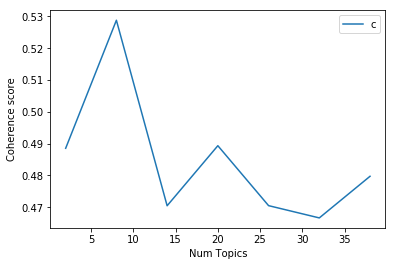

In [71]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

There is excellent coherence at the 5 topics I had used, so we will stay with that, in an effort to avoid being overly selective.

## A (Quasi) Supervised Approach

### Bag of Words

#### BoW with SKLearn CountVectorizer

In [72]:
#Setting additional stopwords
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'databasejava', 'andcollaborate', 'toolsadditional', 'offhealthcare',
                               'includeproviding', 'workflowsmentor', 'forecastingvideo', 'areadatastax',
                               'learninghighly', 'data', 'science', 'big', 'spark', 'computer', 'software','engineering',
                               'research']))

In [73]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def clean_text(text):
    # 1. Remove HTML
    soup = BeautifulSoup(text)
    souped = soup.get_text()
    #
    # 2. Remove non-letters        
    #letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    #
    # 3. Convert to lower case, split into individual words
    lower_case = letters_only.lower() 
    words = tok.tokenize(lower_case)

    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = stop_words                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))   
    
    return (" ".join(words)).strip()

In [74]:
# remove punctuation from the job titles first
#X['job_description'] = X['job_description'].apply(clean_text)
for text in X:
    for i in range(len(X)):
        X['job_description'][i] = clean_text(X['job_description'][i])

In [75]:
#split up for classification
y = X.job_class
X1 = X.job_description

In [76]:
y_train, y_test = train_test_split(y, test_size=0.25, random_state=42)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

vectorizer = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1, 1), max_df=.30, min_df=.10, max_features=None)
bow = vectorizer.fit_transform(X1)
print(vectorizer.get_feature_names())

['abilities', 'able', 'access', 'achieve', 'action', 'active', 'activities', 'additional', 'affirmative', 'age', 'agile', 'ai', 'analytic', 'analytical', 'analyze', 'apache', 'applicable', 'applicants', 'application', 'applied', 'apply', 'applying', 'approaches', 'appropriate', 'architecture', 'area', 'areas', 'around', 'art', 'artificial', 'assist', 'attention', 'available', 'aws', 'bachelor', 'background', 'basic', 'basis', 'benefits', 'better', 'bring', 'bs', 'candidate', 'candidates', 'capabilities', 'care', 'career', 'center', 'challenges', 'challenging', 'change', 'changing', 'citizenship', 'class', 'classification', 'clearly', 'client', 'clients', 'closely', 'cloud', 'code', 'coding', 'collaborate', 'collaboration', 'collaborative', 'com', 'committed', 'communicate', 'community', 'companies', 'competitive', 'computing', 'concepts', 'conduct', 'consideration', 'content', 'continuous', 'contribute', 'control', 'core', 'creating', 'creative', 'critical', 'cross', 'culture', 'curren

In [78]:
#Split into X_train and X_test now that BoW is complete.
X_train, X_test= train_test_split(bow, test_size=0.25, random_state=42)

### Models to test initial Bag of Words

In [79]:
start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.994954954954955

Test set score: 0.7483801295896328
Done in 0.28565406799316406 seconds


In [80]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9520720720720721

Test set score: 0.6879049676025918
Done in 0.5653049945831299 seconds


In [81]:
start = time.time()
clf = XGBClassifier()  
clf.fit(X_train,y_train)  
clf.predict(X_test)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))
cross_val = cross_val_score(clf, X_train, y_train)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9520720720720721

Test set score: 0.6879049676025918
Cross Validation Score: [0.84913793 0.87365011 0.82844734]
Cross Validation Mean: 0.8504117929579449
Done in 36.7276930809021 seconds


The BoW did not perform well, even with a boosted model. 

### K Means

In [82]:
# Normalize the data.
X_norm = normalize(X_train)

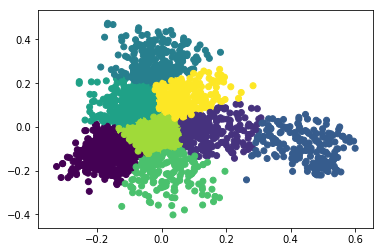

Done in 0.511336088180542 seconds


In [83]:
start = time.time()
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=8, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in", end - start, "seconds")

Pretty nice clusters, with the exception of the variance of the top right green blob.

### KMeans Mini-Batch

In [84]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)
true_k = 10
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

km.fit(X_train_norm)
km_train_label = km.labels_
km_test_label = km.predict(X_test_norm)

In [85]:
from time import time

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_norm, y_train)
y_pred = rfc.predict(X_test_norm)

print('Training set score:', rfc.score(X_train_norm, y_train))
print('\nTest set score:', rfc.score(X_test_norm, y_test))
t0 = time()
print("Done in %0.3fs" % (time() - t0))

Training set score: 0.9945945945945946

Test set score: 0.7505399568034558
Done in 0.000s


In [86]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8223423423423424

Test set score: 0.714902807775378
Done in 0.17373228073120117 seconds


### LSA with BoW

In [87]:
# Logistic Regression Classifier
import time
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_norm,y_train)

print('Training set score:', lr.score(X_train_norm, y_train))
print('\nTest set score:', lr.score(X_test_norm, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8223423423423424

Test set score: 0.714902807775378
Done in 0.16944599151611328 seconds


In [88]:
start = time.time()
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(bow)
terms = vectorizer.get_feature_names()
X_train_lsa = lsa.fit_transform(X_train)
X_test_lsa = lsa.transform(X_test)

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")
end = time.time()
print("Done in", end - start, "seconds")

Concept 0:
understand
service
statistical
project
process
others
speech
may
ensure
cloud
 
Concept 1:
others
understand
speech
service
appropriate
duties
procedures
ensure
essential
care
 
Concept 2:
statistical
insights
analytical
statistics
predictive
methods
quantitative
project
mining
analytic
 
Concept 3:
enterprise
sales
apache
cloud
architecture
project
ensure
platform
aws
client
 
Concept 4:
care
health
may
security
education
staff
medical
healthcare
procedures
federal
 
Done in 5.990591049194336 seconds


### Bigrams

In [89]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X1, y, test_size=0.25, random_state=42)
count_vect_bigram = CountVectorizer(stop_words=stop_words, analyzer='word', ngram_range=(1,2), max_df=.30, min_df=.1, max_features=100000)
train_data_bow_bigram = count_vect_bigram.fit_transform(X_train_clean)
test_data_bow_bigram = count_vect_bigram.transform(X_test_clean)

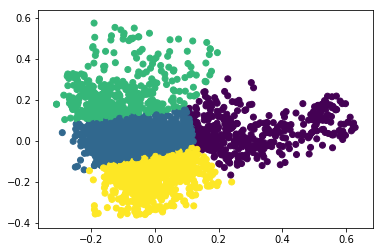

In [90]:
X_norm = normalize(train_data_bow_bigram)
# Reduce it to two components.
X_pca_bow = PCA(2).fit_transform(X_norm.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca_bow)

# Plot the solution.
plt.scatter(X_pca_bow[:, 0], X_pca_bow[:, 1], c=y_pred)
plt.show()

In [91]:
y.unique()

array(['Natural Language Processing', 'Text Mining',
       'Pattern Recognition', 'Machine Learning', 'Text Analytics',
       'Apache Spark', 'Speech Recognition', 'Neural Networks'],
      dtype=object)

In [92]:
labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

Training set score: 0.9621621621621622

Test set score: 0.7041036717062635
Cross-Valid Bigram Fold Results are:  [0.67730496 0.72241993 0.725      0.72142857 0.75539568 0.75636364
 0.72       0.70181818 0.67636364 0.73357664]
Mean of Folds are =  0.718967124512766
Done in %0.3fs 6.466041803359985


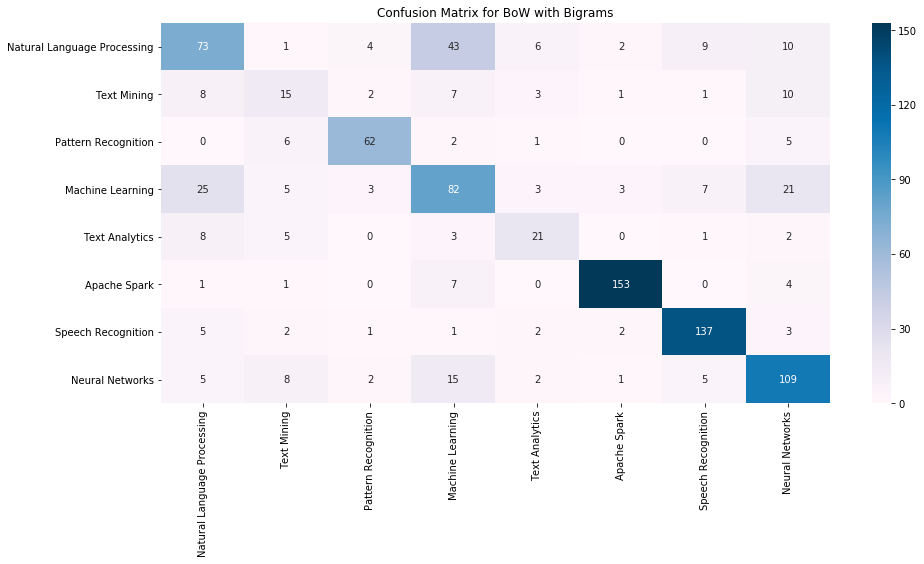

In [93]:
import time
start = time.time()

#Confusion matrix for Bigram BOW with Logistic Regression

lr = LogisticRegression()
lr.fit(train_data_bow_bigram,y_train)

print('Training set score:', lr.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', lr.score(test_data_bow_bigram, y_test_clean))

y_pred = lr.predict(test_data_bow_bigram)

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')
crs = cross_val_score(lr, train_data_bow_bigram, y_train_clean, cv=10)
print("Cross-Valid Bigram Fold Results are: ",crs)
print("Mean of Folds are = ",crs.mean())
end = time.time()
print("Done in %0.3fs", end - start)
#conf = confusion_matrix(y_test_clean, bigram_pred, labels = labels)

#df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  #columns = [i for i in labels])
#plt.figure(figsize = (15,7))
#sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [94]:
import time
start = time.time()

clf = XGBClassifier(silent=True, 
                    scale_pos_weight=1,
                    learning_rate=0.01,  
                    colsample_bytree = 0.4,
                    subsample = 0.85,
                    objective='binary:logistic', 
                    n_estimators=600, 
                    reg_alpha = 0.3,
                    max_depth=7, 
                    gamma=1)  
clf.fit(train_data_bow_bigram,y_train)
y_pred = clf.predict(test_data_bow_bigram)
#bigram_pred = clf.predict(test_data_bow_bigram.toarray())
print('Training set score:', clf.score(train_data_bow_bigram, y_train_clean))
print('\nTest set score:', clf.score(test_data_bow_bigram, y_test_clean))
cross_val = cross_val_score(clf, train_data_bow_bigram, y_train_clean)
print('Cross Validation Score:', cross_val)
print('Cross Validation Mean:', cross_val.mean())
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9751351351351352

Test set score: 0.8736501079913607
Cross Validation Score: [0.87715517 0.8887689  0.85450597]
Cross Validation Mean: 0.8734766808905765
Done in 240.35662984848022 seconds


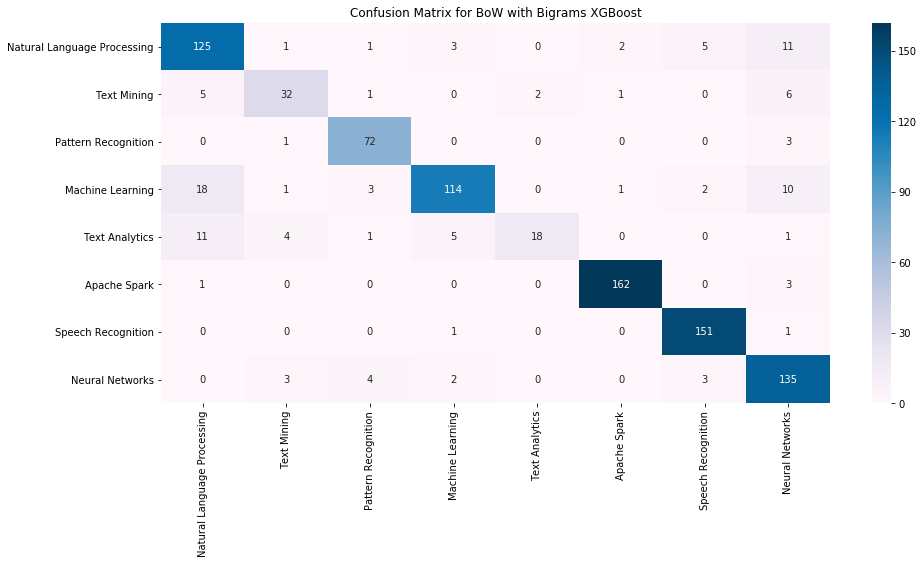

In [95]:
#Confusion matrix for XGB performance visualization on bigrams

labels = ['Natural Language Processing', 'Text Mining',
         'Pattern Recognition', 'Machine Learning', 'Text Analytics',
         'Apache Spark', 'Speech Recognition', 'Neural Networks']

conf = confusion_matrix(y_test_clean, y_pred, labels = labels)

cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
plt.title('Confusion Matrix for BoW with Bigrams XGBoost')
sns.heatmap(cm, annot=True, cmap="PuBu", fmt = 'd')

## TF-IDF Analysis

### Train and Test Sets


In [96]:
tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(bow)
tfidf.shape

(3701, 426)

In [97]:
X_train_tfidf, X_test_tfidf = train_test_split(tfidf, test_size=0.25, random_state=42)

In [98]:
import time

start = time.time()

rfc = ensemble.RandomForestClassifier()
fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.9935135135135135

Test set score: 0.7526997840172787
Done in 0.28455138206481934 seconds


In [99]:
# Logistic Regression Classifier
start = time.time()
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train)

print('Training set score:', lr.score(X_train_tfidf, y_train))
print('\nTest set score:', lr.score(X_test_tfidf, y_test))
end = time.time()
print("Done in", end - start, "seconds")

Training set score: 0.8245045045045045

Test set score: 0.7159827213822895
Done in 0.1626579761505127 seconds


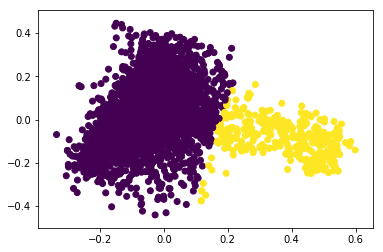

Done in %0.3fs 0.3666238784790039


In [100]:
start = time.time()
# Normalize the data.
X_normt = normalize(tfidf)
# Reduce it to two components.
X_pcat = PCA(2).fit_transform(X_normt.todense())

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pcat)

# Plot the solution.
plt.scatter(X_pcat[:, 0], X_pcat[:, 1], c=y_pred)
plt.show()
end = time.time()
print("Done in %0.3fs", end - start)

In [101]:
en_stop = set(nltk.corpus.stopwords.words('english'))
stop_words = en_stop.union(set(['machine','business','analytics','learning','technology',
                              'system', 'science', 'research', 'analysis', 'experience',
                               'customer', 'include', 'plant', 'clerkship', 'language',
                               'university', 'google', 'hadoop', 'spark', 'apache', 'mircosoft']))

In [102]:
start = time.time()
rfc = ensemble.RandomForestClassifier()

vectorizer1 = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the job descriptions
                             min_df=10, # only use words that appear at least 10x
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case 
                             use_idf=True,
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

X_train_tfidf = vectorizer1.fit_transform(X_train_clean)
X_test_tfidf = vectorizer1.transform(X_test_clean)

fit = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

print('Training set score:', rfc.score(X_train_tfidf, y_train))
print('\nTest set score:', rfc.score(X_test_tfidf, y_test))
end = time.time()
print("Done in %0.3fs", end - start)

Training set score: 0.9942342342342342

Test set score: 0.7224622030237581
Done in %0.3fs 1.7958459854125977


In [ ]:
start = time.time()
X = X_train_tfidf
X_norm_tfidf = normalize(vectorizer1.fit_transform(X))

true_k = 10
labels = y_train 
km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', batch_size=5000)

print("Clustering sparse data with %s" % km)
km.fit(X_norm_tfidf)
mini_labels = km.labels_
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_norm_tfidf, km.labels_, sample_size=5000))
end = time.time()
print("Done in %0.3fs", end - start)

In [104]:
len(y)

3701

In [105]:
len(X1)

3701

In [106]:
len(mini_labels)

3701

In [107]:
mini_labels.shape

(3701,)

In [108]:
df['MiniBatchLabels'] = mini_labels

ValueError: Length of values does not match length of index

In [ ]:
for label in set(mini_labels):
    print('Cluster: %d' % label)
    print(df[df.MiniBatchLabels == label].groupby('job_class').count())
    print('')

In [ ]:
#Let's check Cluster 0 - the largest
shuffle(df[df.MiniBatchLabels == 0]).head(10)

In [ ]:
#Let's check Cluster 1
shuffle(df[df.MiniBatchLabels == 1]).head(10)

In [ ]:
#Cluster 2
shuffle(df[df.MiniBatchLabels == 2]).head(10)

### LSA with TF-IDF

In [ ]:
print("Number of features: %d" % X_train_tfidf.get_shape()[1])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space to about 10% of the original.
svd= TruncatedSVD(2100)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of job descriptions our solution considers similar, for the first five identified topics
jobs_by_component=pd.DataFrame(X_train_lsa, index=list(X_train))
for i in range(5):
    print('Component {}:'.format(i))
    print(jobs_by_component.loc[:,i].sort_values(ascending=False)[0:10])
import time
print(time.time())

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components=5,n_iter=500)
lsa.fit(tfidf)
terms = vectorizer.get_feature_names()

for i,comp in enumerate(lsa.components_):
    termsInComp = zip(terms,comp)
    sortedterms = sorted(termsInComp, key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" % i)
    for term in sortedterms:
        print(term[0])
    print(" ")

In [ ]:
#Try a GBM classifier here, using TF-IDF 

clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
tfidf_pred = clf.predict(X_test_tfidf.toarray())

print('Training set score:', clf.score(X_train_tfidf.toarray(), y_train))
print('\nTest set score:', clf.score(X_test_tfidf.toarray(), y_test))

In [ ]:
#Confusion matrix for GBM performance visualization on TF-IDF

conf = confusion_matrix(y_test, tfidf_pred, labels = labels)

df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (15,7))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt = 'd')

In [ ]:
X_train_tfidf.shape

In [ ]:
#LSA with Tf-idf
mlp = neural_network.MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic')
train = mlp.fit(X_train_lsa, y_train)
mlp_y_pred = mlp.predict(X_test_lsa)

print('Training set score:', mlp.score(X_train_lsa, y_train))
print('\nTest set score:', mlp.score(X_test_lsa, y_test))